<a href="https://colab.research.google.com/github/muhammadfajrulfaiz/KMI/blob/main/PYTN_KampusMerdeka_fp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

MEMBER KELOMPOK
  1. Muhammad Fajrul Faiz
  2. Ardi Yuliantoro
  3. Darry Ramadhan Abdussalam

PROJECT
  1. Final Project 3 (FP 3)
  2. PYTN Batch 4

Data ini memiliki 13 atribut dengan tujuan untuk membuat model Prediksi keselamatan pasien dari penyakit jantung.

Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

Dataset di dapat dari kaggle (data heart failure).

##Import Pustaka

In [354]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ploty_fig
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Loading

Melakukan read data menggunakan salah satu library pandas

In [355]:
df = pd.read_csv("/content/drive/MyDrive/Hacktiv8/heart_failure_clinical_records_dataset.csv")
#looking at dataset
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


NOTE : 

  Sex - Gender of patient ; Male = 1, Female = 0

  Diabetes - 0 = No, 1 = Yes

  Anaemia - 0 = No, 1 = Yes

  High_blood_pressure - 0 = No, 1 = Yes

  Smoking - 0 = No, 1 = Yes

  DEATH_EVENT - 0 = No, 1 = Yes

In [356]:
#mengecek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##DATA CLEANING

In [357]:
#check missing values di setiap kolom
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dikarenakan data kita tidak ada missing values jadi tidak perlu adanya replace terhadap missing values

In [358]:
#Describe dari dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


hasil statistik yang di peroleh 

In [359]:
#cek apakah ada data duplikat
df.duplicated().sum()

0

tidak ada duplicated dalam value rows

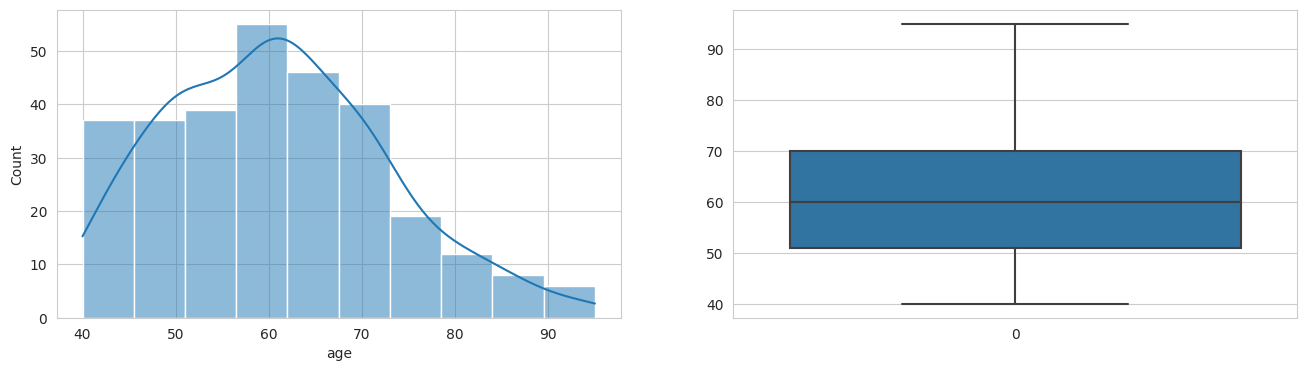

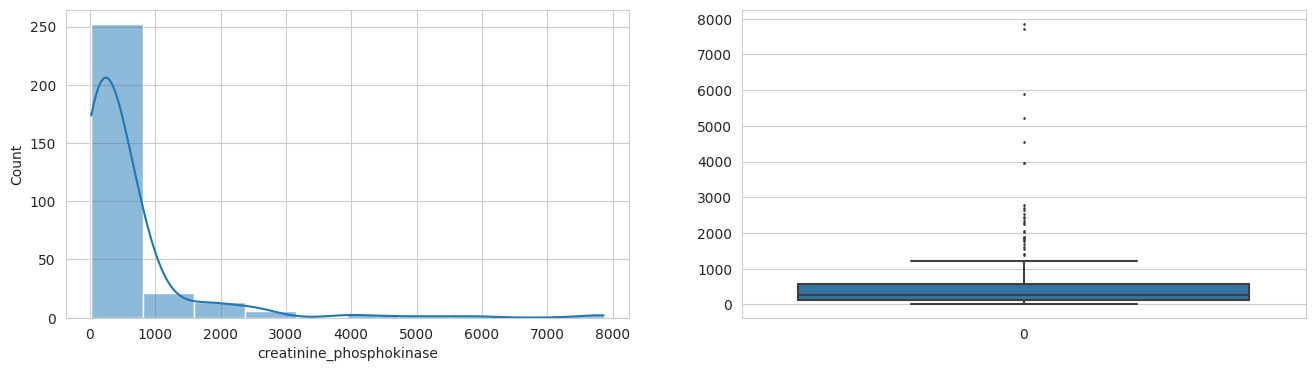

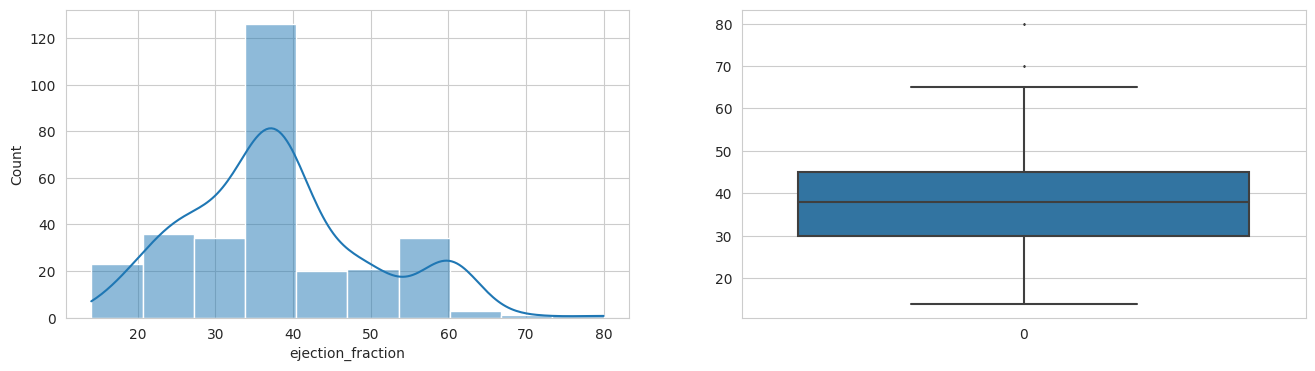

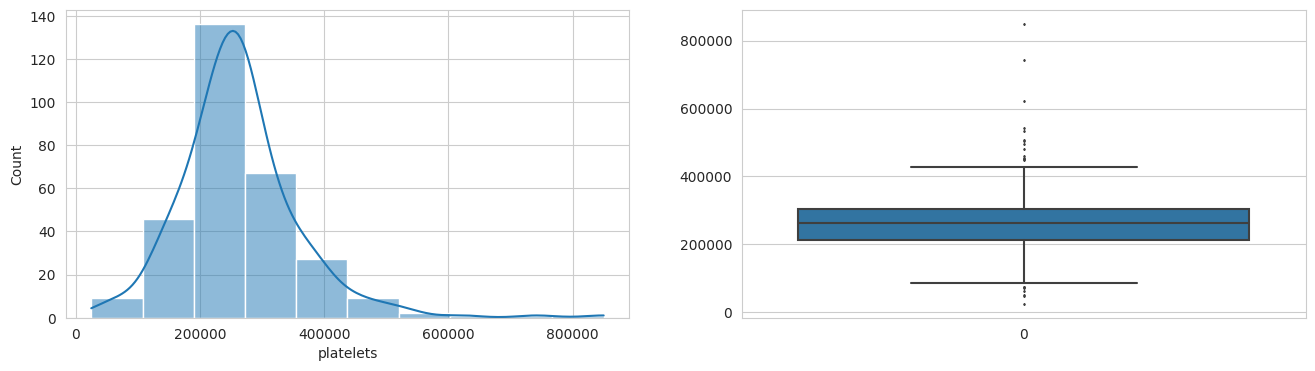

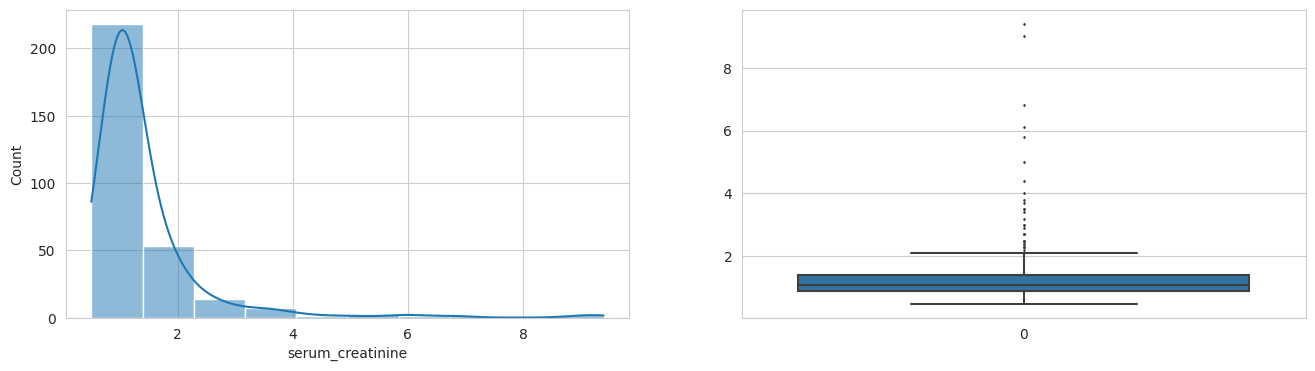

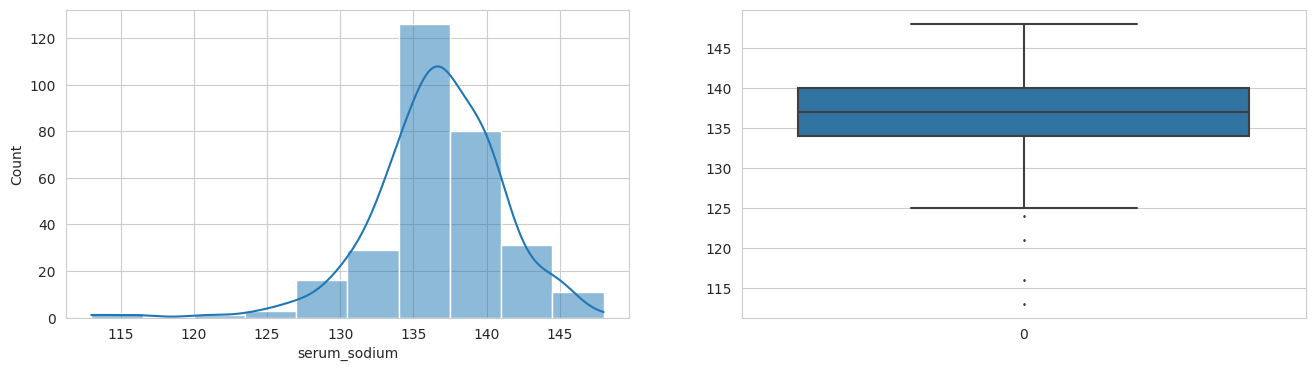

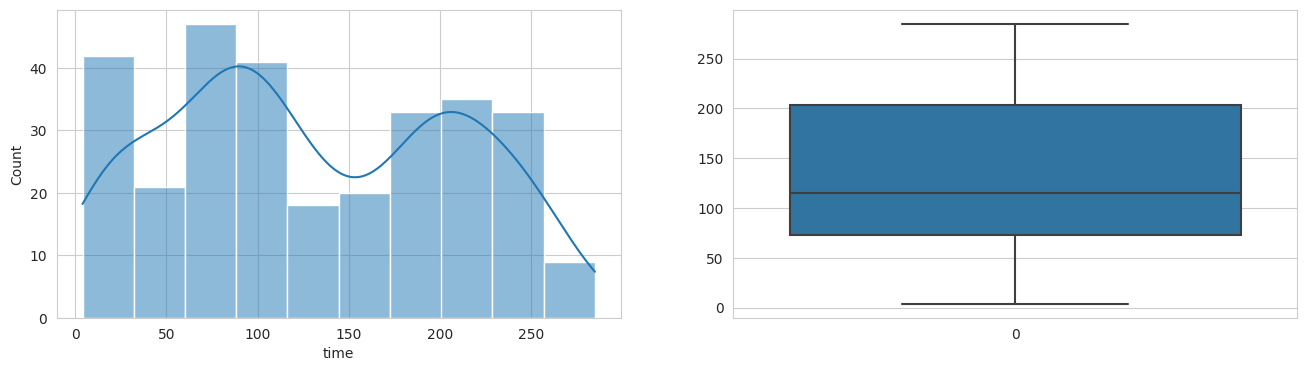

In [360]:
# numerical features
numerical_columns = ['age', 
                     'creatinine_phosphokinase', 
                     'ejection_fraction', 
                     'platelets', 'serum_creatinine', 
                     'serum_sodium', 
                     'time']

# membuat visualization untuk setiap numerikal features kita agar bisa melihat distribusi dan mengecek apakah terdapat outliers dalam features kita 

for col in numerical_columns:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

    sns.histplot(df[col], bins=10, kde=True,  ax=ax[0])
    
    sns.boxplot(df[col], fliersize=1, ax=ax[1])


Distribusi data dalam datasets kita rata rata all features memiliki kemiripan dengan normal distribution akan tetapi ada beberapa features yang sangat menunjukkan skewed seperti "creatine_phosphokinase" dan "serum creatine"


Jika dilihat beberapa fitur terdapat outlier, dalam hal ini kami sudah mencoba beberapa teknik handling outliers seperti capping dan trims serta dropping outliers akan tetapi untuk penanganan handling outliers ini membuat datasets tidak lagi aktual seperti menggunakan capping maupun drop/trims yang membuat datasets kita semakin habis. Untuk itu dikarenakan datasets yang sedikit, outliers dalam datasets tidak terlalu menyebabkan alur statistik yang fluktuatif sehingga tidak dilakukan metode outliers 

In [361]:
#handling oulier 

#Menghitung nilai quartil q1 dan q3
#q1 = df[col].quantile(0.25) 
#q3 = df[col].quantile(0.75) 

#Menghitung rentang interquartile (IQR)
#iqr = q3 - q1

#Menentukan batas atas dan batas bawah untuk outlier dengan rumus berikut
#upper_bound = q3 + 1.5 * iqr
#lower_bound = q1 - 1.5 * iqr

#Replace nilai outlier dengan upper_bound atau lower_bound
#df[numerical_columns] = df[numerical_columns].clip(lower_bound, upper_bound, axis=1)
#capping = df[numerical_columns]

Dilanjutkan dengan EDA ( Exploratory Data Analytics ) sehingga kita bisa lebih mengetahui isi datasets kita lebih jauh sebelum dilakukan beberapa modelling Machine Learning

## Exploration Data Analysis (EDA)

Dalam EDA pertama kita, kita akan melihat distribusi umur dalam dataset kita agar mengetahui persebaran umur yang ada dalam dataset

In [362]:
# distribusi umur 

hist_umur = [df['age'].values]
group = ['age']

#visualisasikan dengan distribution plot 
fig = ploty_fig.create_distplot(hist_umur,group)
fig.update_layout(title_text = 'Distribusi Umur')
fig.show()

Insight : 

1. rentang umur dalam dataset kurang lebih ada di umur 40 - 80 keatas
2. distribusi umur dalam dataset lebih banyak di umur 60 kebawah sedangkan untuk umur diatas 80 sangatlah sedikit 

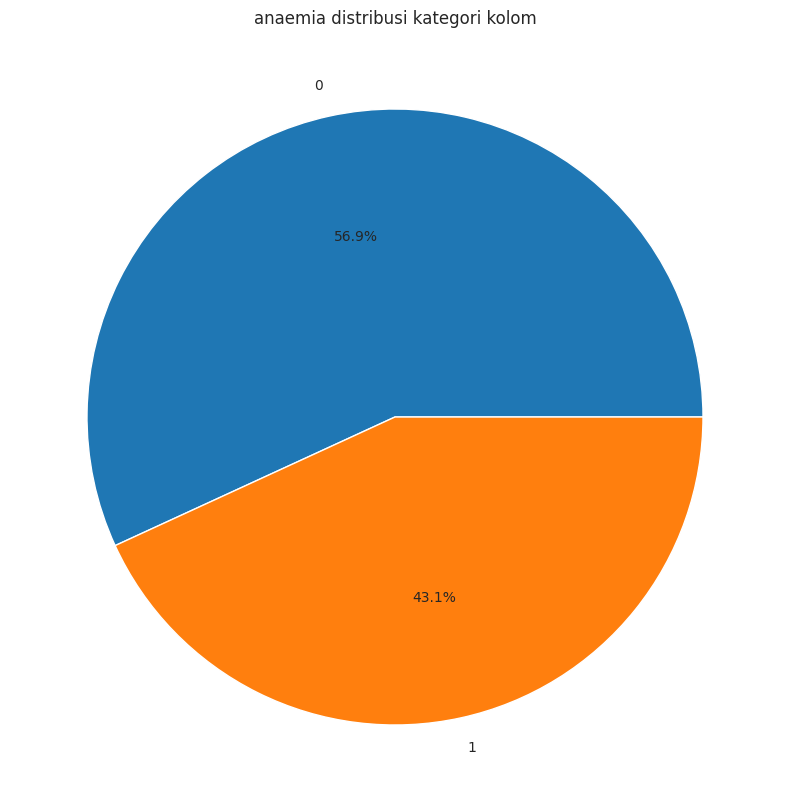

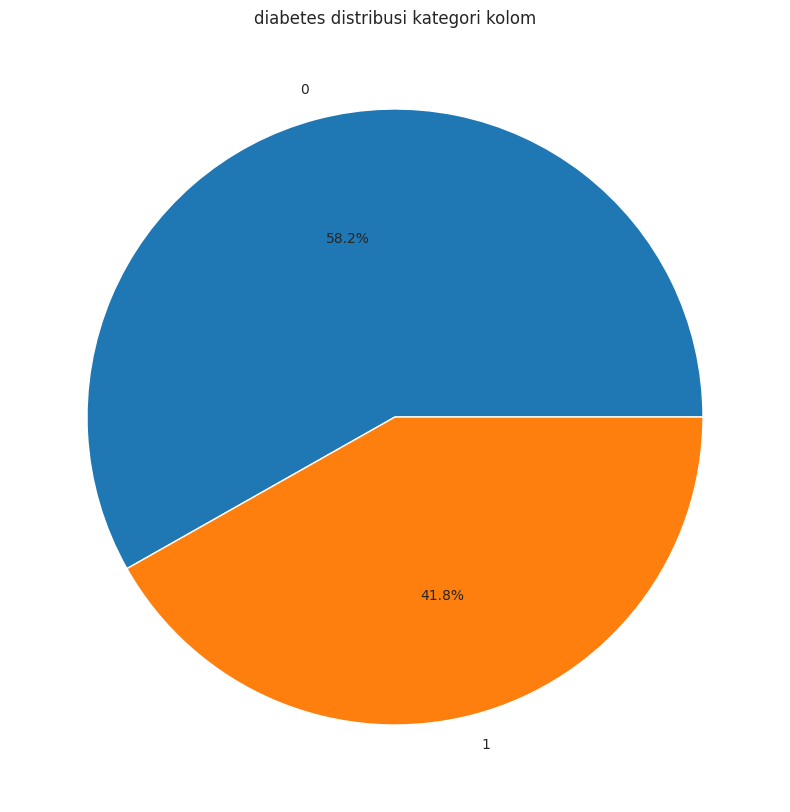

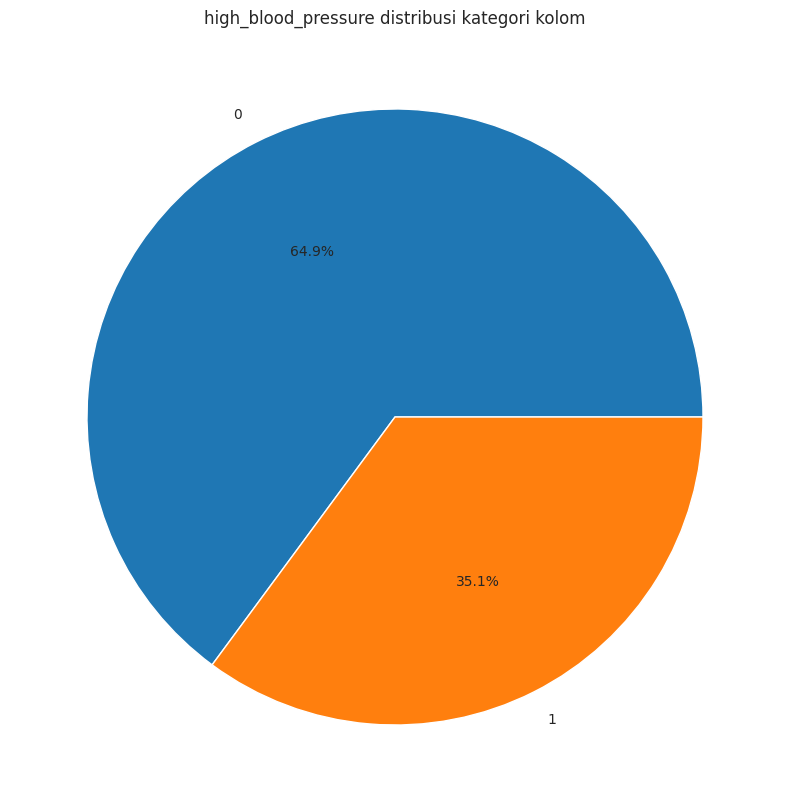

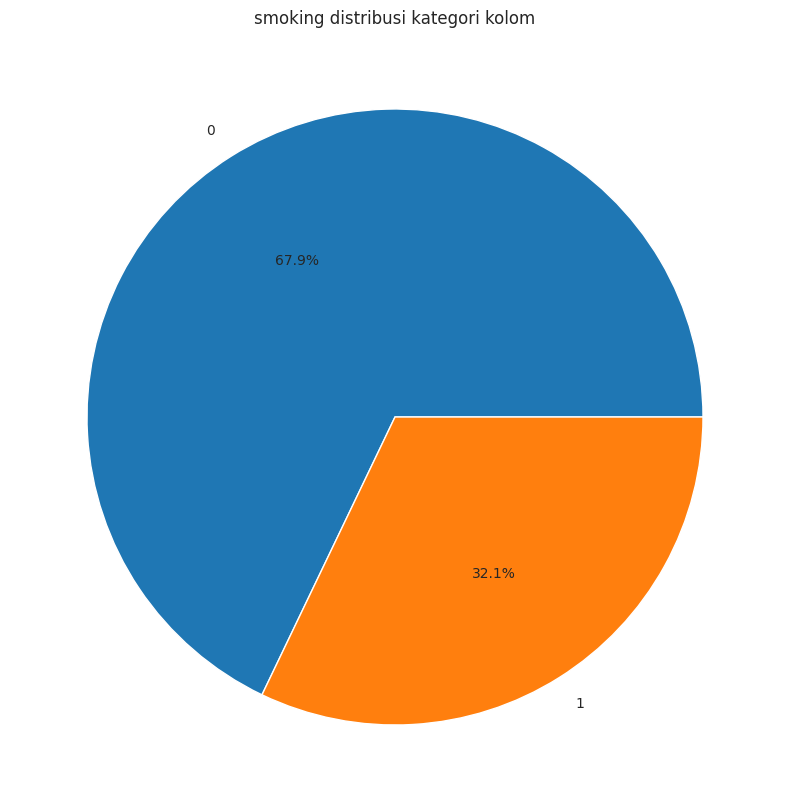

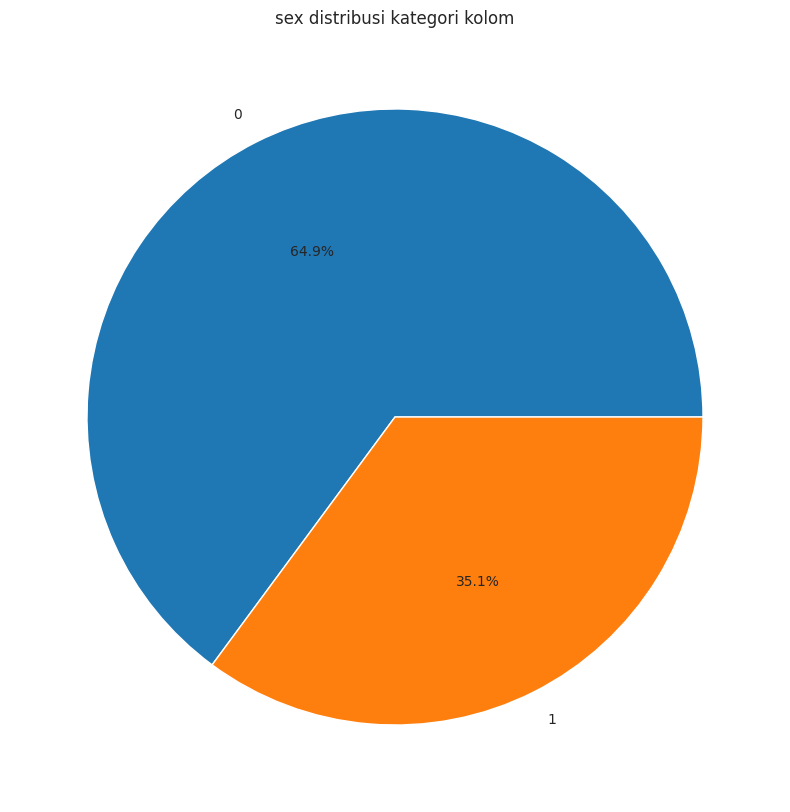

In [363]:
#melihat distribusi data kategori kolom
categorical_kolom= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

for C in categorical_kolom:
    plt.pie(df[C].value_counts(), autopct = '%1.1f%%', labels=[0,1])
    plt.title(C + ' distribusi kategori kolom')
    plt.show()

Insight :

categorical_kolom= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

hasil distribusi categorical_kolom menunjukkan bahwa nilai 0 lebih mendominasi daripada nilai 1 yang berarti bahwa dari dataset menunjukkan angka penderita anemia, diabetes, high blood, smooking lebih sedikit daripada terjangkit. Dan untuk kategori sex sendiri didominasi oleh 0 atau perempuan

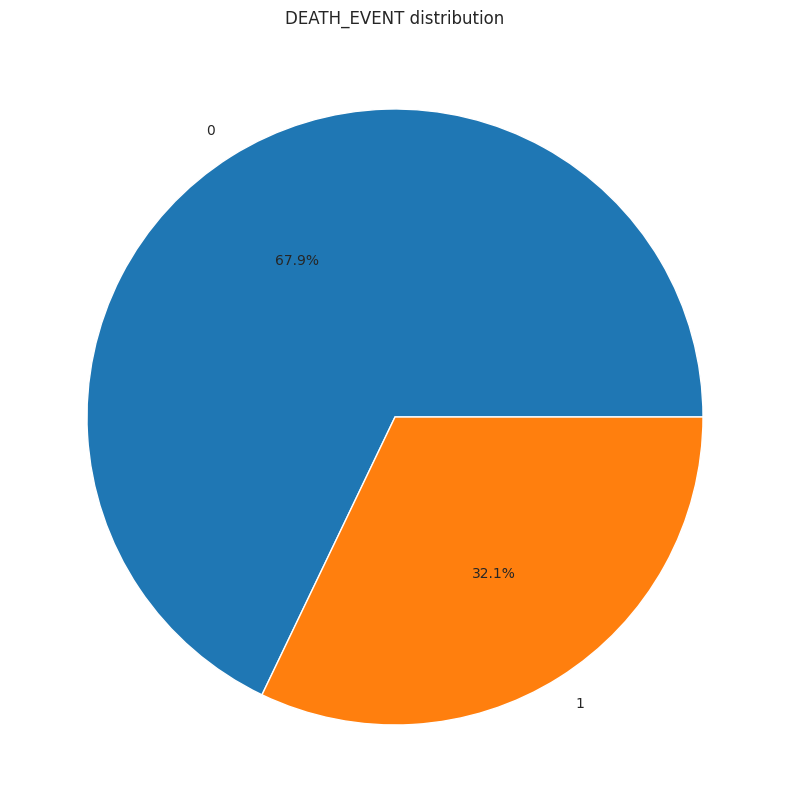

In [364]:
#melihat distribusi target kolom 

plt.pie(df['DEATH_EVENT'].value_counts(), autopct='%1.1f%%', labels=[0,1])
plt.title( 'DEATH_EVENT distribution')
plt.show()

Dari visualisasi dapat disimpulkan bahwa distribusi jumlah data kematian lebih rendah daripada  0 / tidak 

In [365]:
#analisis survival terhadap gender 

female = df[df['sex']==0]
male   = df[df['sex'] == 1]

female_survd = female[df['DEATH_EVENT']==0]
male_survd = male[df['DEATH_EVENT']==0]
female_not_survd = female[df['DEATH_EVENT']==1]
male_not_survd = male[df['DEATH_EVENT']==1]

values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]

labels = ['Male - Survived',
          'Male - Not Survived', 
          "Female -  Survived", 
          "Female - Not Survived"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analisis Survival terhadap Gender")
fig.show()

<ipython-input-365-587c14d2e2ec>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-365-587c14d2e2ec>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-365-587c14d2e2ec>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-365-587c14d2e2ec>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-365-587c14d2e2ec>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-365-587c14d2e2ec>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



insight : 
Perbandingan gender antara female dan male serta analisis terhadap features dari survived dapat dilihat bahwa tingkat not survived male lebih tinggi sekitar 20.7% dengan jumlah 62 daripada female dengan presentase 11.4% dan jumlah 34.

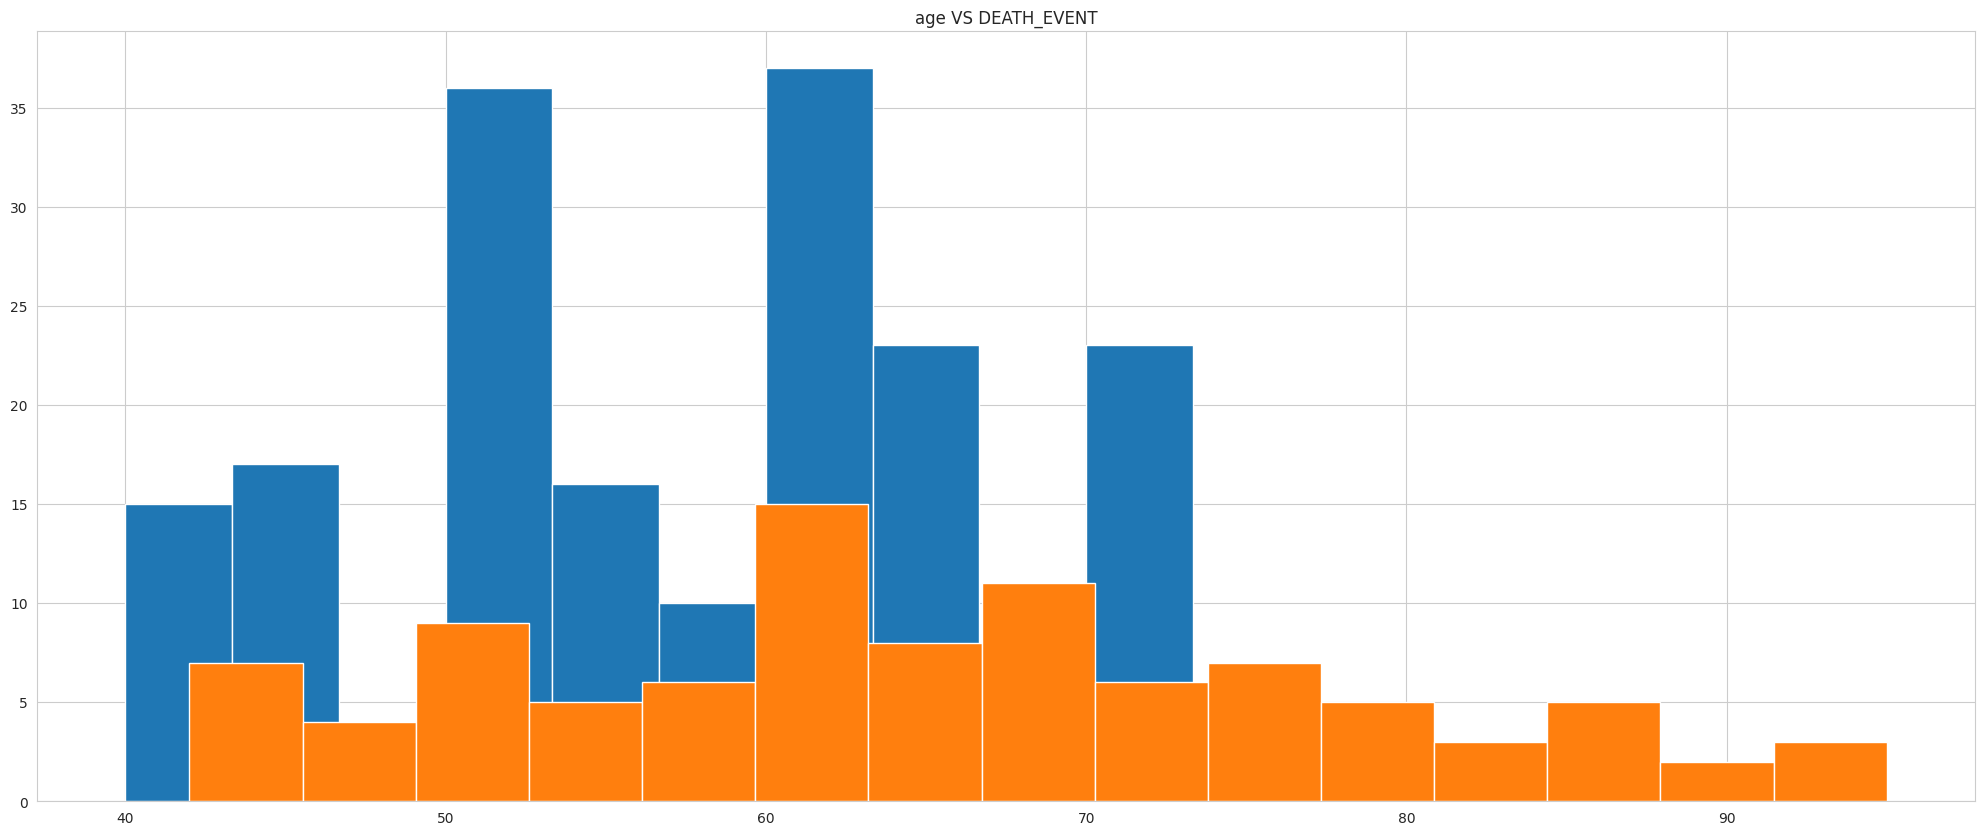

In [366]:
#analisis umur terhadap kolom death_event (bertahan hidup)
age = ['age']
for i in age:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=15, alpha=1)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=15, alpha=1)
    plt.title(f'{i} VS DEATH_EVENT')
    plt.show()

insight : 
1. 
Kelangsungan hidup tinggi pada 40 hingga 70
2. Penyebaran tidak bertahan hidup melewat di semua

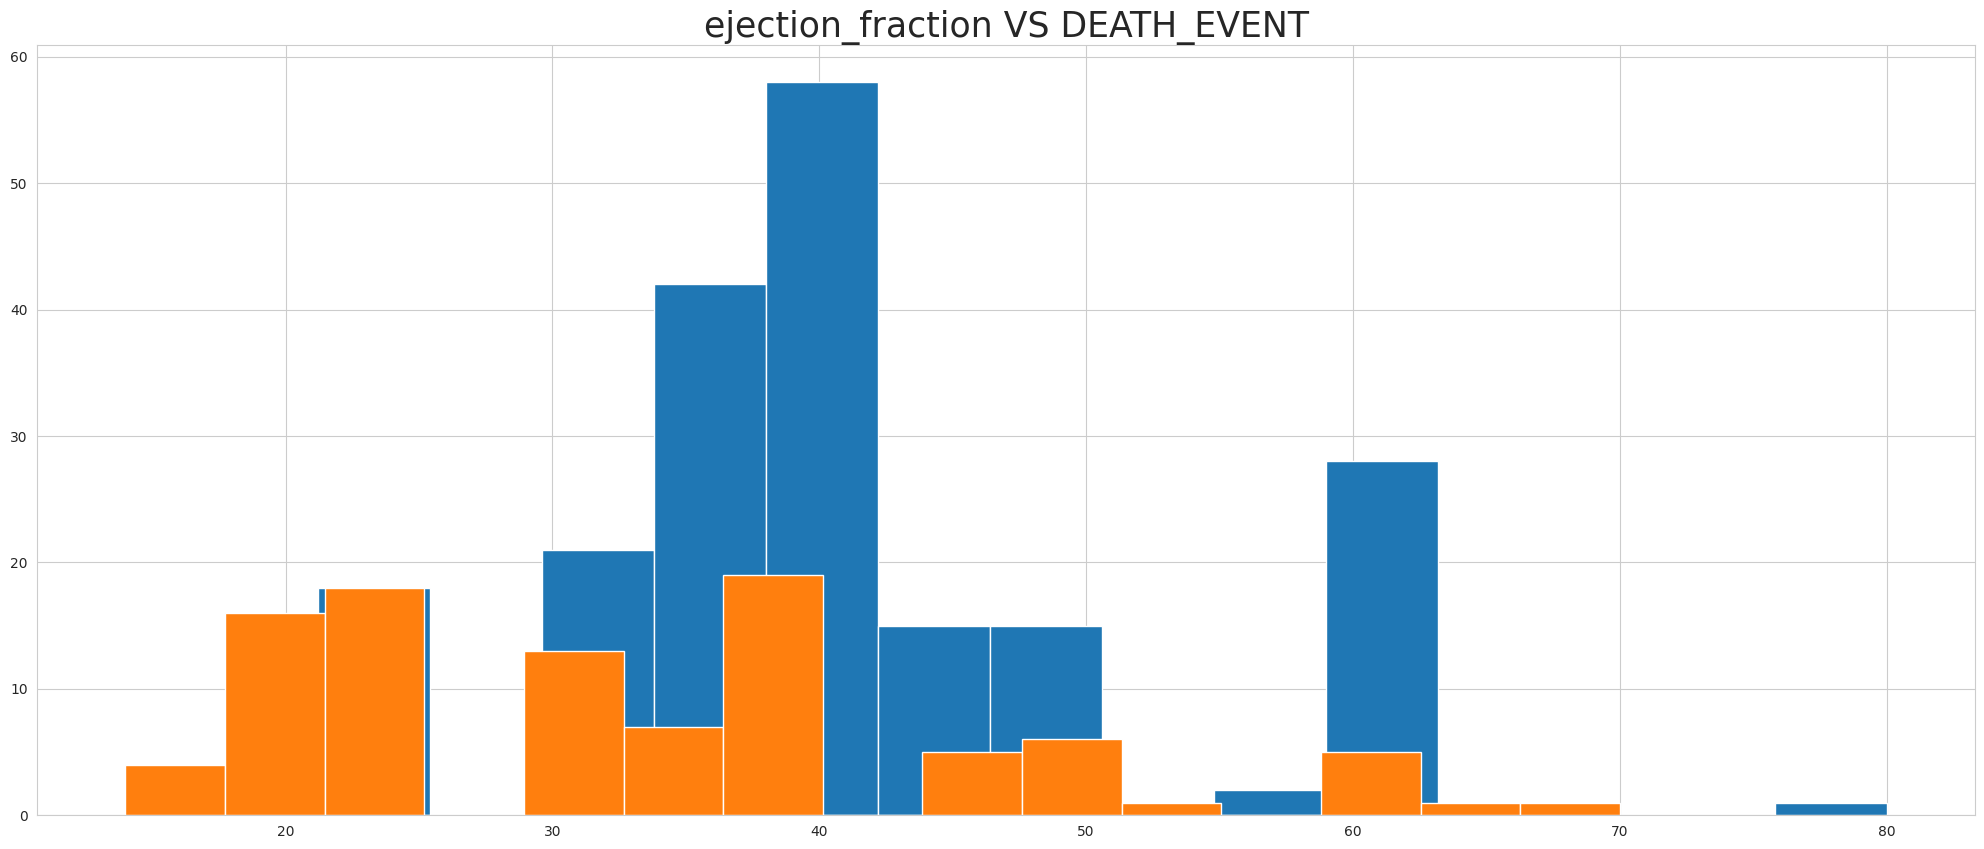

In [367]:
#analisis serum_creatine terhadap bertahan hidup
kontraksi_jantung = ['ejection_fraction']
for i in kontraksi_jantung:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=15, alpha=1)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=15, alpha=1)
    plt.title(f'{i} VS DEATH_EVENT',fontsize = 25)
    plt.show()

insight : 
1. probabilitas tingkat kematian lebih tinggi ketika ejection_fraction dibawah 40% 
2. Semakin tinggi ejection_fraction tingkat kematian semakin rendah 

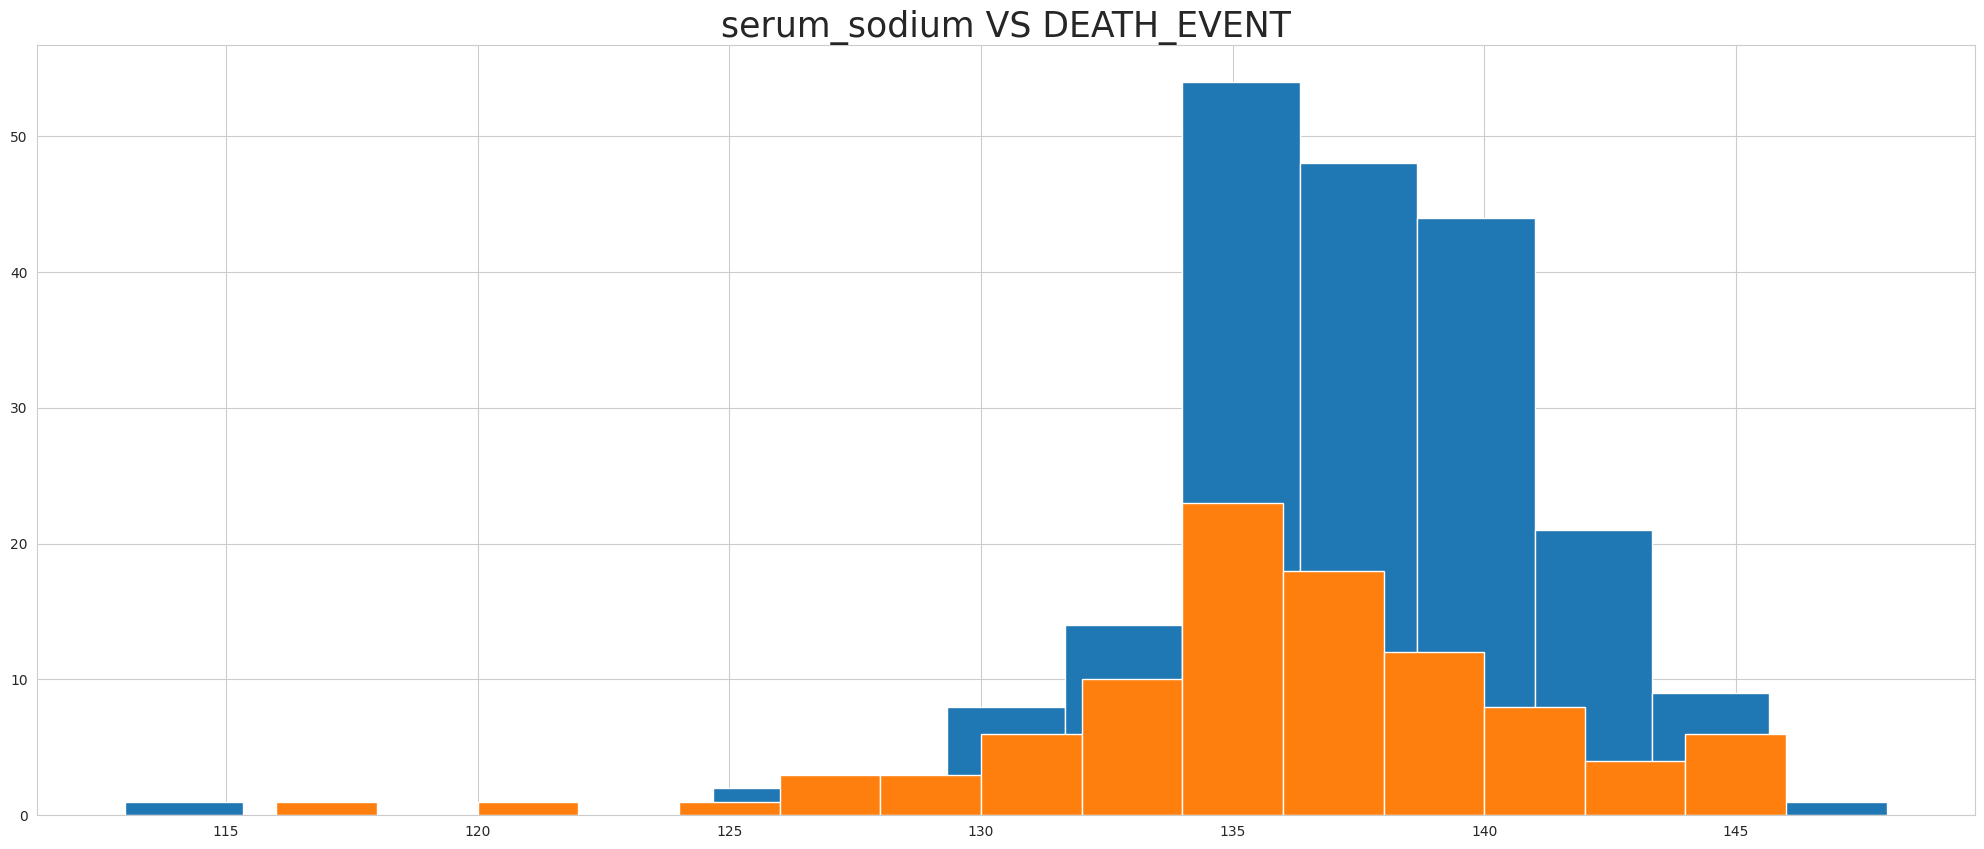

In [368]:
serum_sodium = ['serum_sodium']
for i in serum_sodium:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=15, alpha=1)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=15, alpha=1)
    plt.title(f'{i} VS DEATH_EVENT', fontsize = 25)
    plt.show()

insight : 
probababilitas nilai tekanan serum_sodium 127 - 145 memiliki tingkat death even lebih tinggi.

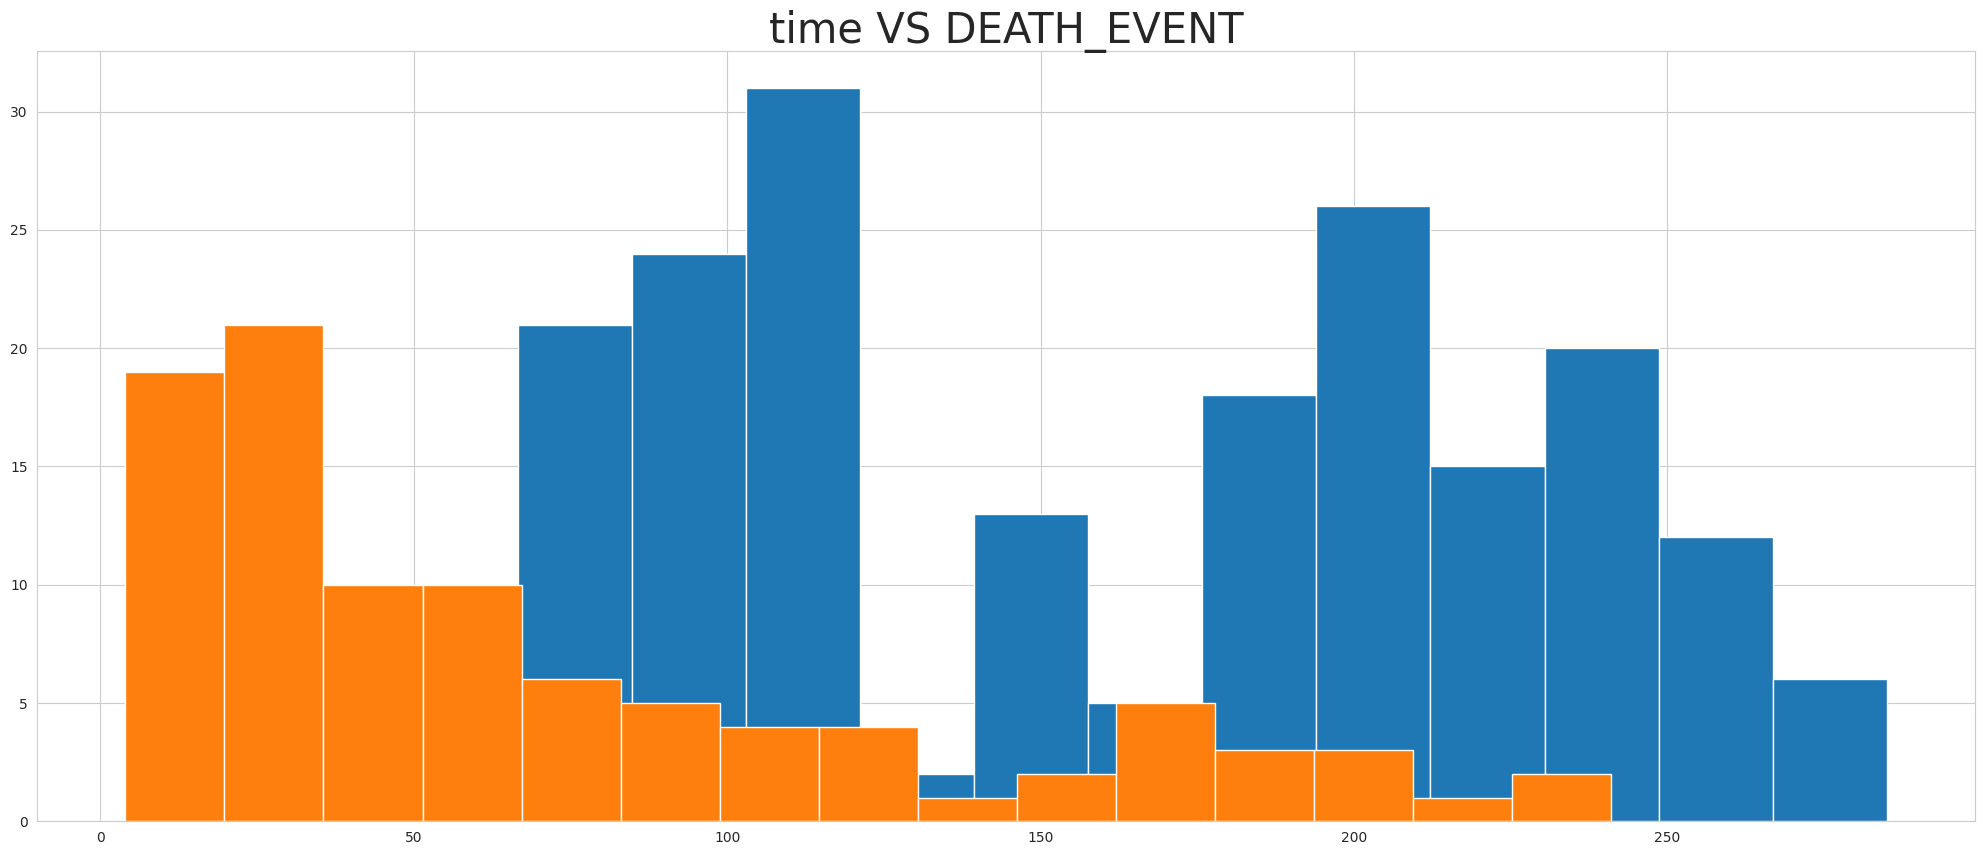

In [369]:
time = ['time']
for i in time:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=15, alpha=1)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=15, alpha=1)
    plt.title(f'{i} VS DEATH_EVENT', fontsize = 30)
    plt.show()

insight : 
time_indicator dibawah 100 indikator cukup kuat untuk death_event

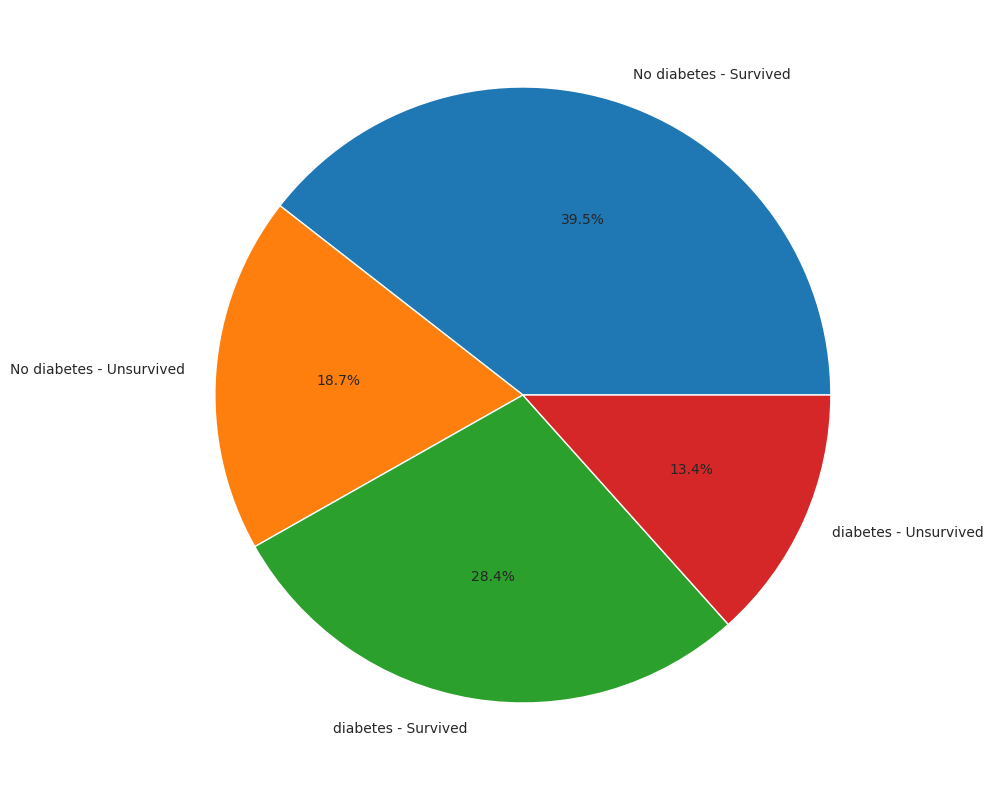

In [370]:
grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

In [371]:
#analisis diabetes terhadap death_event 

no_diabetes = df[df['diabetes']==0]
diabetes   = df[df['diabetes'] == 1]

no_diabetes_survived = no_diabetes[df['DEATH_EVENT']==0]
diabetes_survived = diabetes[df['DEATH_EVENT']==0]
no_diabetes_not_survived = no_diabetes[df['DEATH_EVENT']==1]
diabetes_not_survived = diabetes[df['DEATH_EVENT']==1]

values = [len(diabetes[df["DEATH_EVENT"]==0]),len(diabetes[df["DEATH_EVENT"]==1]),
         len(no_diabetes[df["DEATH_EVENT"]==0]),len(no_diabetes[df["DEATH_EVENT"]==1])]

labels = ['diabetes - Survived',
          'diabetes - Not Survived', 
          "no diabetes -  Survived", 
          "no diabetes - Not Survived"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analisis diebetes terhadap death_event")
fig.show()

<ipython-input-371-9abc75649074>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-371-9abc75649074>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-371-9abc75649074>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-371-9abc75649074>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-371-9abc75649074>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-371-9abc75649074>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



insight : 
1. dari visualisasi pie chart dapat diketahui bahwa terdapat 85 orang penderita diabetes survived dan terdapat 40 orang diabetes tapi tidak survived

2. sementara terdapat 118 orang tidak diabetes survived dan tidak diabetes tidak survived 56 orang 

3. Jumlah not survived lebih banyak didominasi oleh bukan penderita diabetes.

In [372]:
#analisis smoking terhadap death_event 

no_smoking = df[df['smoking']==0]
smoking   = df[df['smoking'] == 1]

no_smoking_survived = no_smoking[df['DEATH_EVENT']==0]
smoking_survived = smoking[df['DEATH_EVENT']==0]
no_smoking_not_survived = no_smoking[df['DEATH_EVENT']==1]
smoking_not_survived = smoking[df['DEATH_EVENT']==1]

values = [len(smoking[df["DEATH_EVENT"]==0]),len(smoking[df["DEATH_EVENT"]==1]),
         len(no_smoking[df["DEATH_EVENT"]==0]),len(no_smoking[df["DEATH_EVENT"]==1])]

labels = ['smoking - Survived',
          'smoking - Not Survived', 
          "no smoking -  Survived", 
          "no smoking - Not Survived"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analisis smoking terhadap death_event")
fig.show()

<ipython-input-372-57897da0e8da>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-372-57897da0e8da>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-372-57897da0e8da>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-372-57897da0e8da>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-372-57897da0e8da>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-372-57897da0e8da>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Insight : 

1. Dalam dataset kita terdapat perokok berjumlah 96 orang dan 66 selamat atau survived sedangkan terdapat 30 orang tidak selamat 


2. Sementara orang bukan perokok merupakan paling mendominasi yaitu sebesar 45.8% atau sejulah 137 orang

# Data Preprocessing

Setelah menganalisis cukup banyak beberapa features terhadap kolom deat_event mari kita lihat seberapa besar korelasi semua features dalam datasets kita

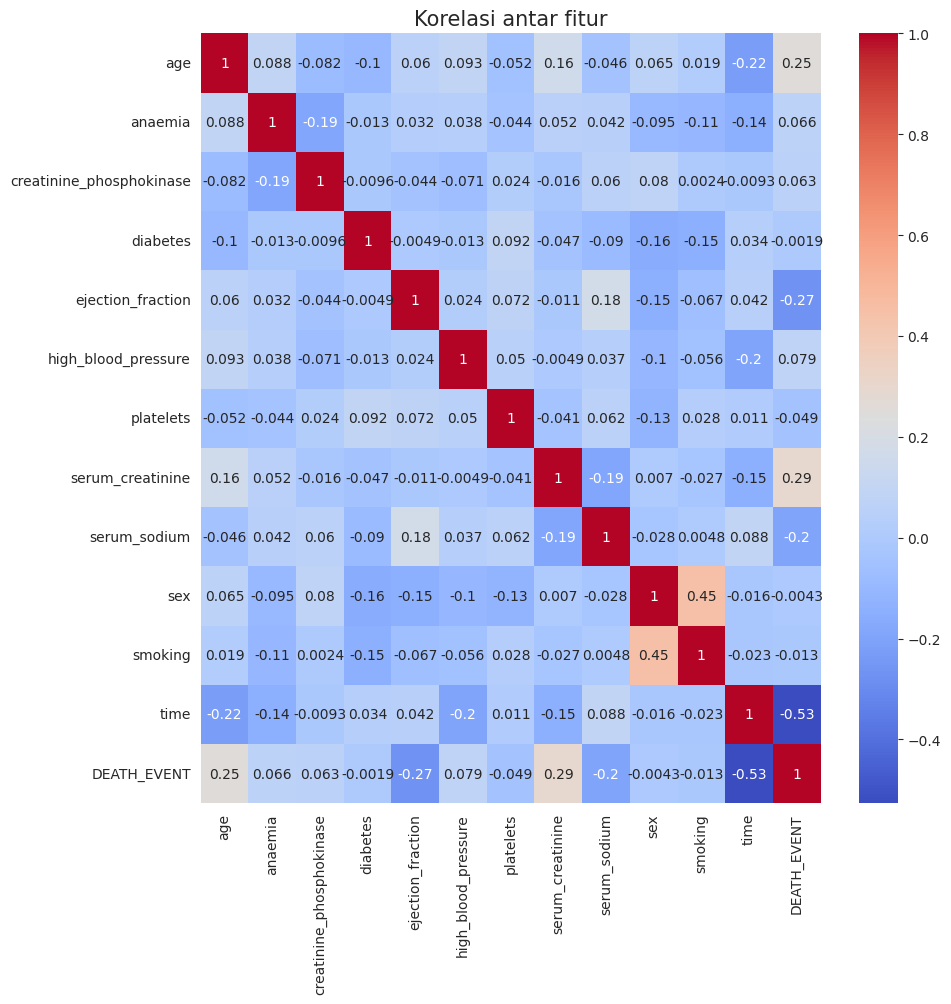

In [373]:
# Cek korelasi antar fitur
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur",size=15)
plt.show()

Korelasi antar fitur yang ditunjukkan masih tergolong rendah atau lemah

## Train, Test, Splitting

In [374]:
# Memisah data target dengan feature 
x = df.iloc[:,:-1] 
y = df.iloc[:, -1]

In [375]:
# Split data
#dengan membagi data 80 : 20 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#Data Scalling

In [376]:
# scalling data 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
accuracy_list= []

## Modeling

## Logistic Regression

In [377]:
# Penerapan Logistic Regression

lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(x_train, y_train)

#prediksi output
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [378]:
# Akurasi dari model

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7666666666666667


In [379]:
#evaluation
log_reg_acc = accuracy_score(y_test, y_pred_lr)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



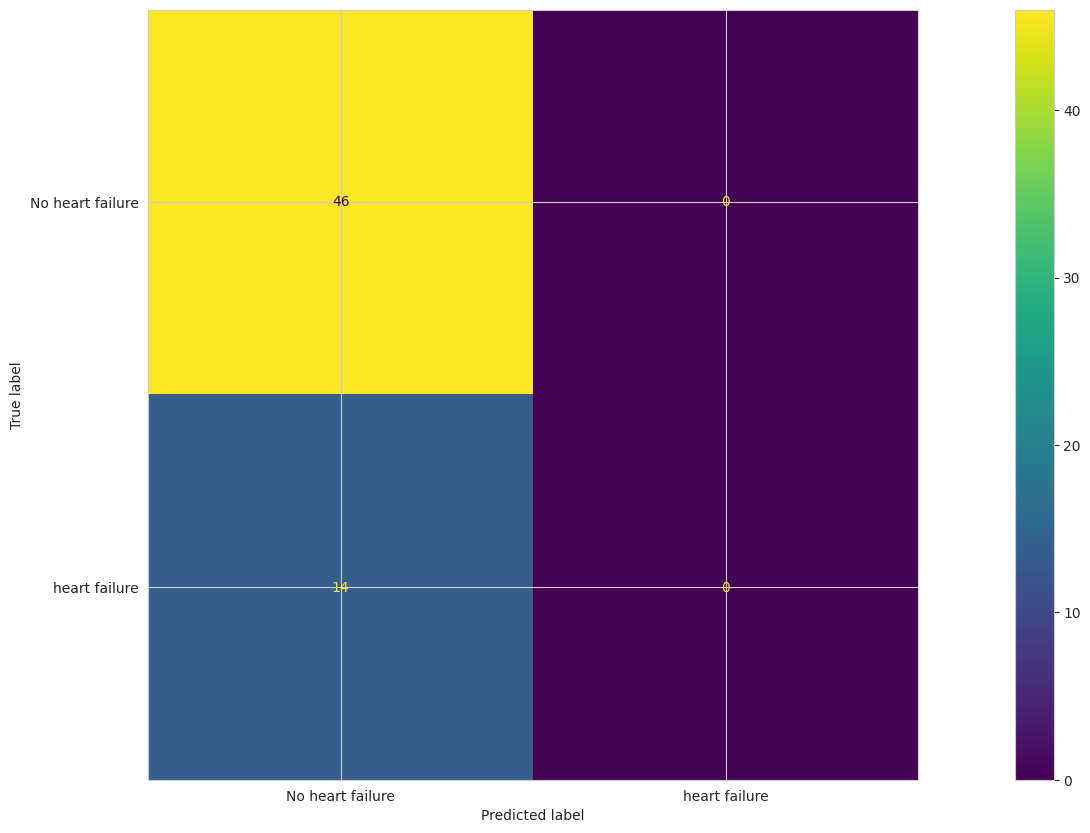

In [380]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



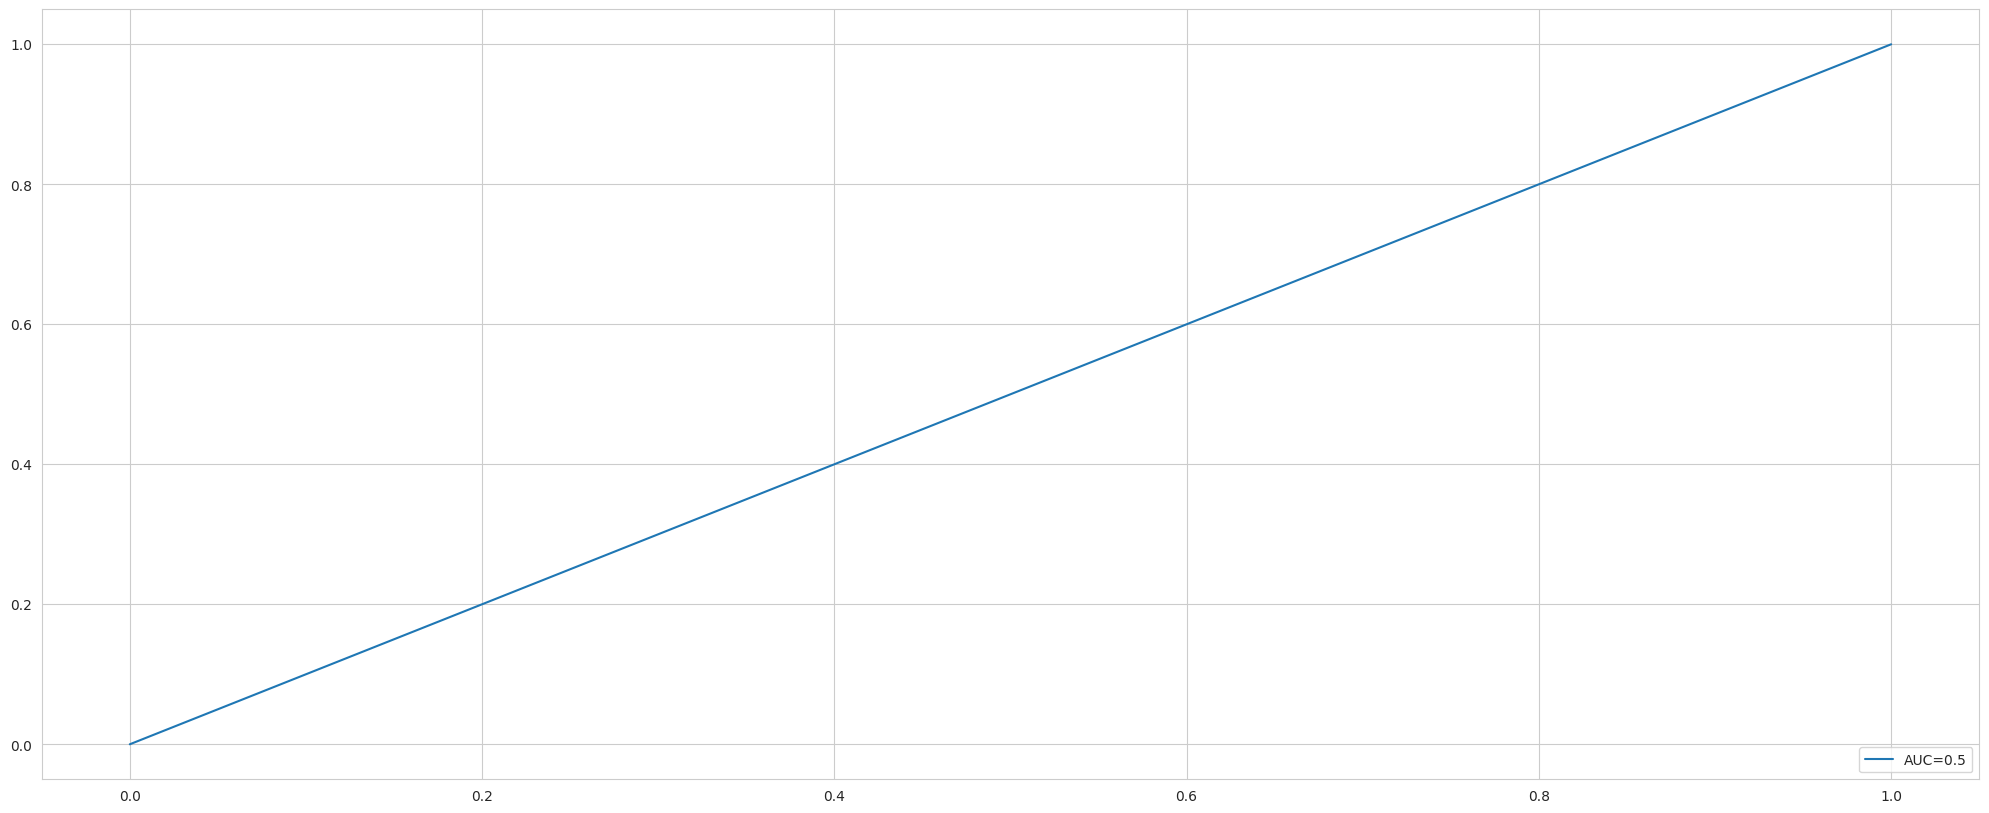

In [381]:
# ROC Curve (Receiver operating characteristic)

y_pred_probabilitas = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probabilitas)
auc = auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Machine

In [382]:
# Model SVM 
svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001, verbose=False)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [383]:
# cek akurasi model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


In [384]:
# evaluation model

svm_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*svm_acc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



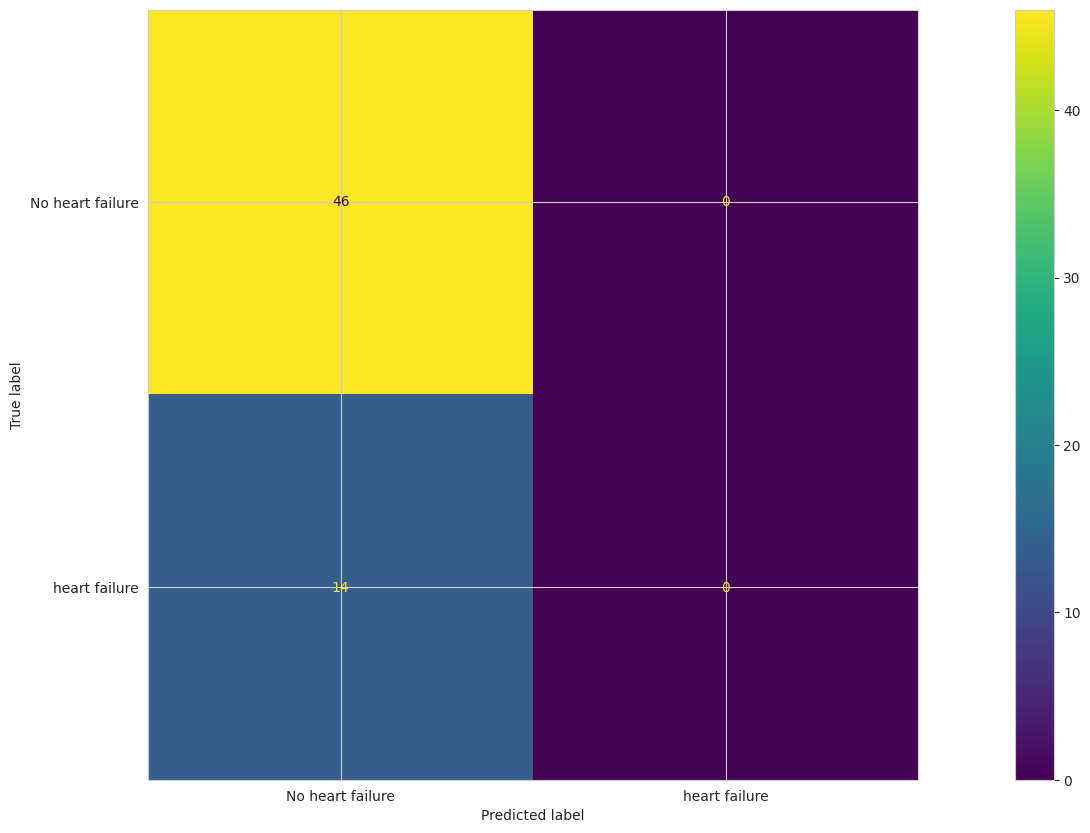

In [385]:
# confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No heart failure','heart failure'])
display_cm.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



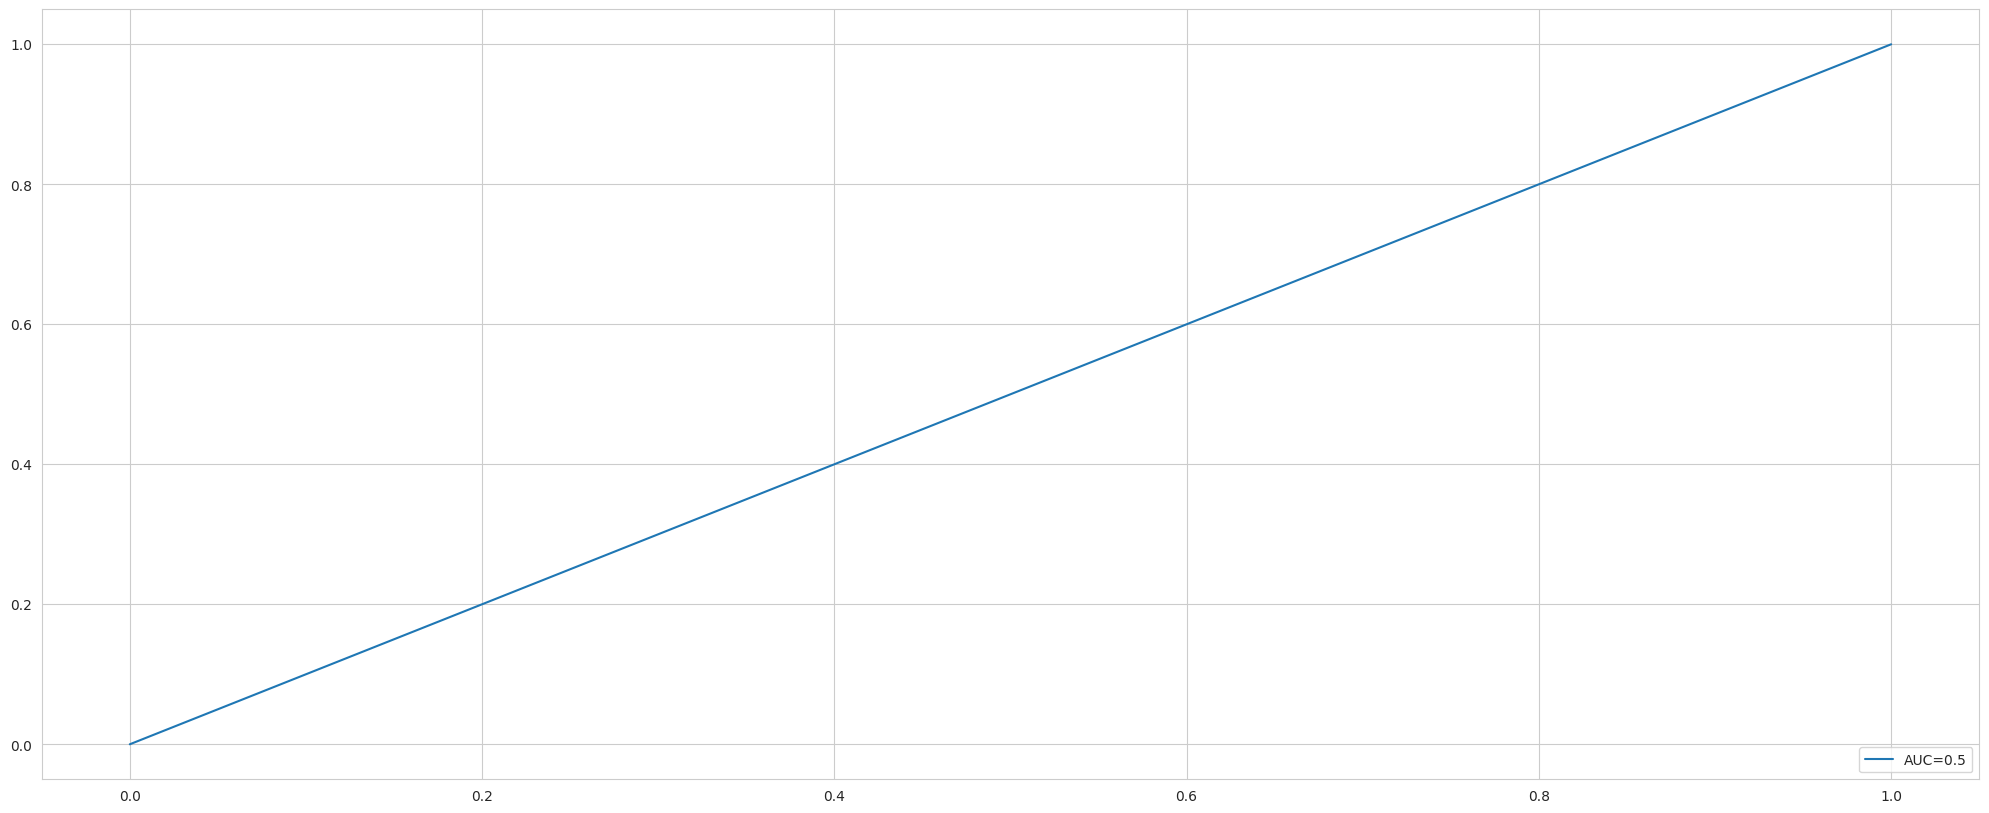

In [386]:
# ROC 

y_pred_probabilitas = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## K-Nearest Neighboor ( KNN )

In [387]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
knn_prediction = KNN.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [388]:
# Cek akurasi model KNN

print("Accuracy:", accuracy_score(y_test, knn_prediction))

Accuracy: 0.7666666666666667


In [389]:
# Evaluation

knn_acc = accuracy_score(y_test, knn_prediction)
accuracy_list.append(100*knn_acc)
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



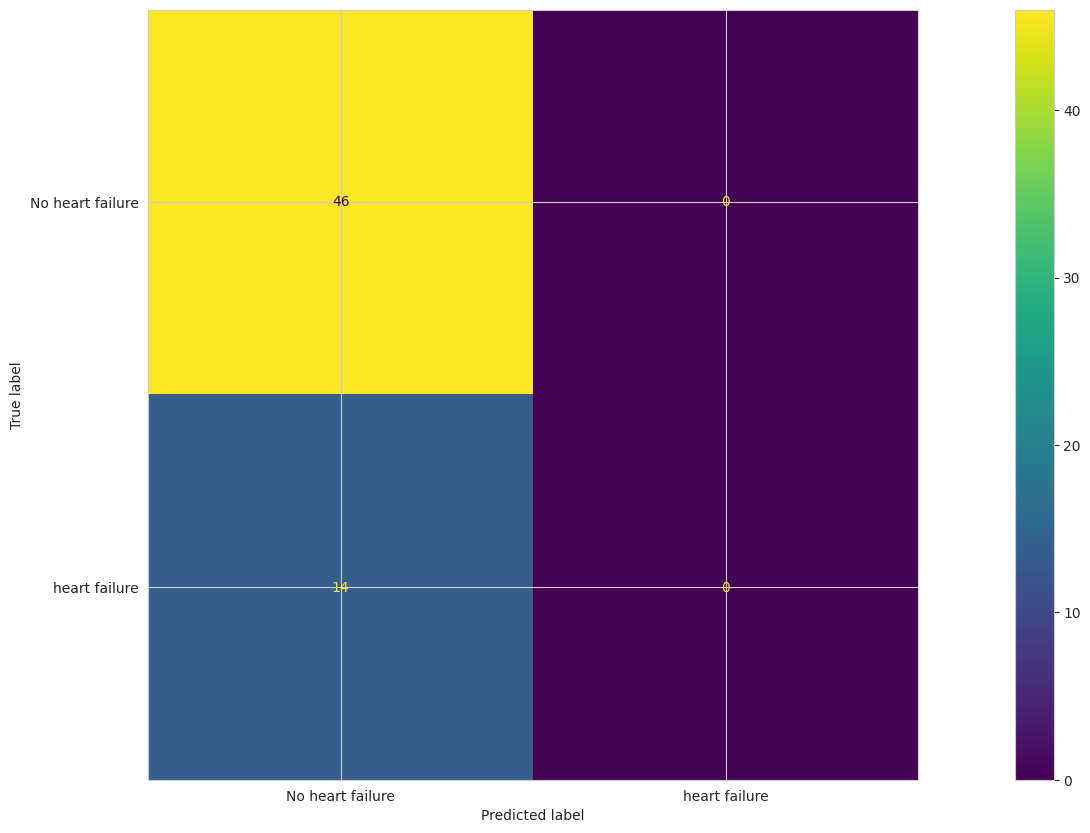

In [390]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

confusion_knn = confusion_matrix(y_test, knn_prediction)
cmd = ConfusionMatrixDisplay(confusion_knn, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



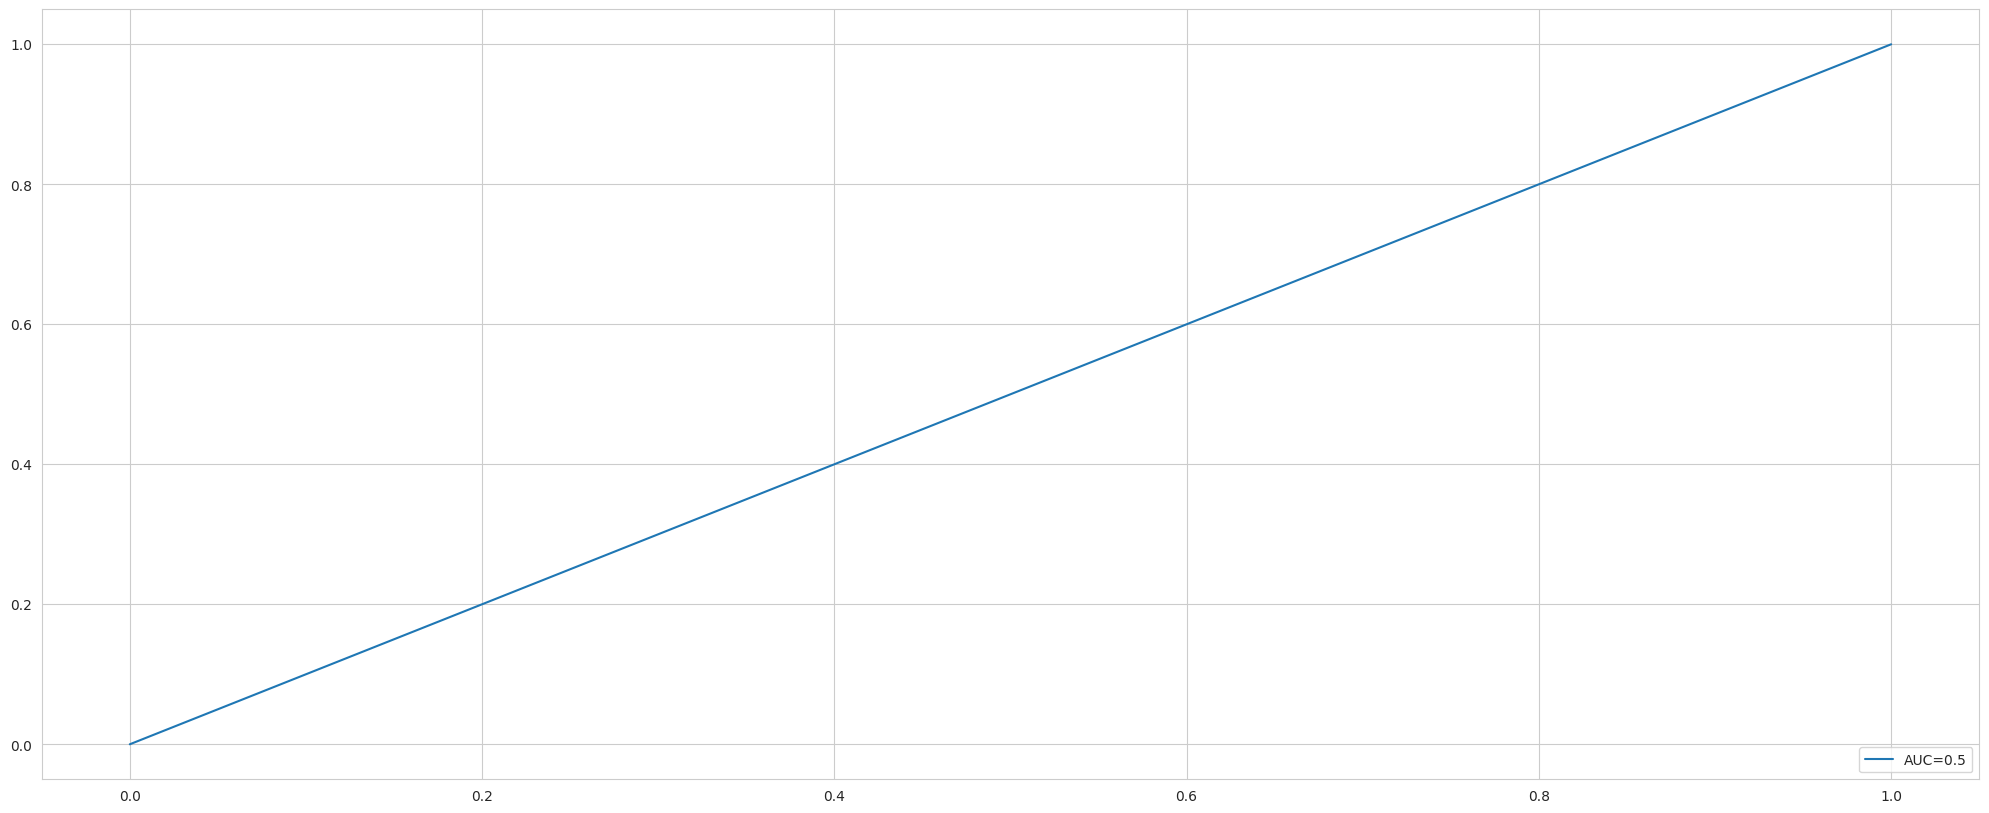

In [391]:
# ROC Curve

y_pred_probabilitas = KNN.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree

In [392]:
#Membuat model 

DT = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
DT.fit(x_train, y_train)
dt_pred = DT.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [393]:
# Cek Akurasi Model 

print("Accuracy:", accuracy_score(y_test, dt_pred))

Accuracy: 0.7666666666666667


In [394]:
# Evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



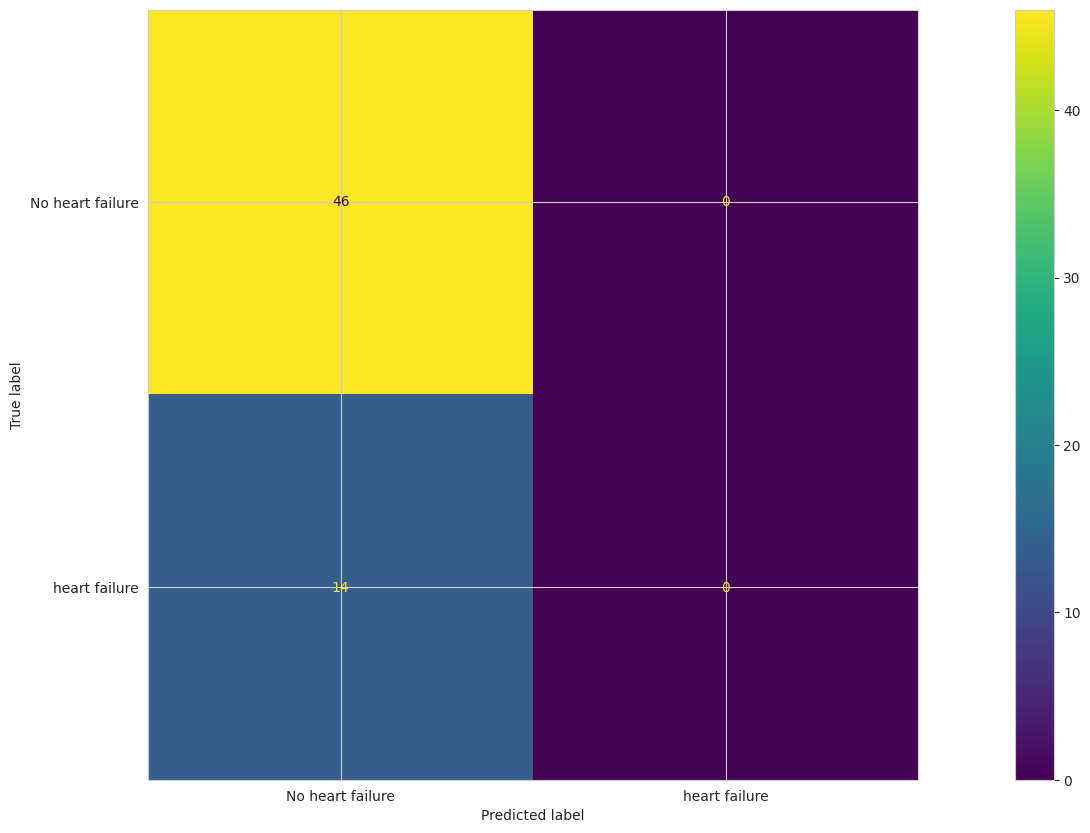

In [395]:
# confusion matrix DT Model

confusion_knn = confusion_matrix(y_test, knn_prediction)
cmd = ConfusionMatrixDisplay(confusion_knn, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



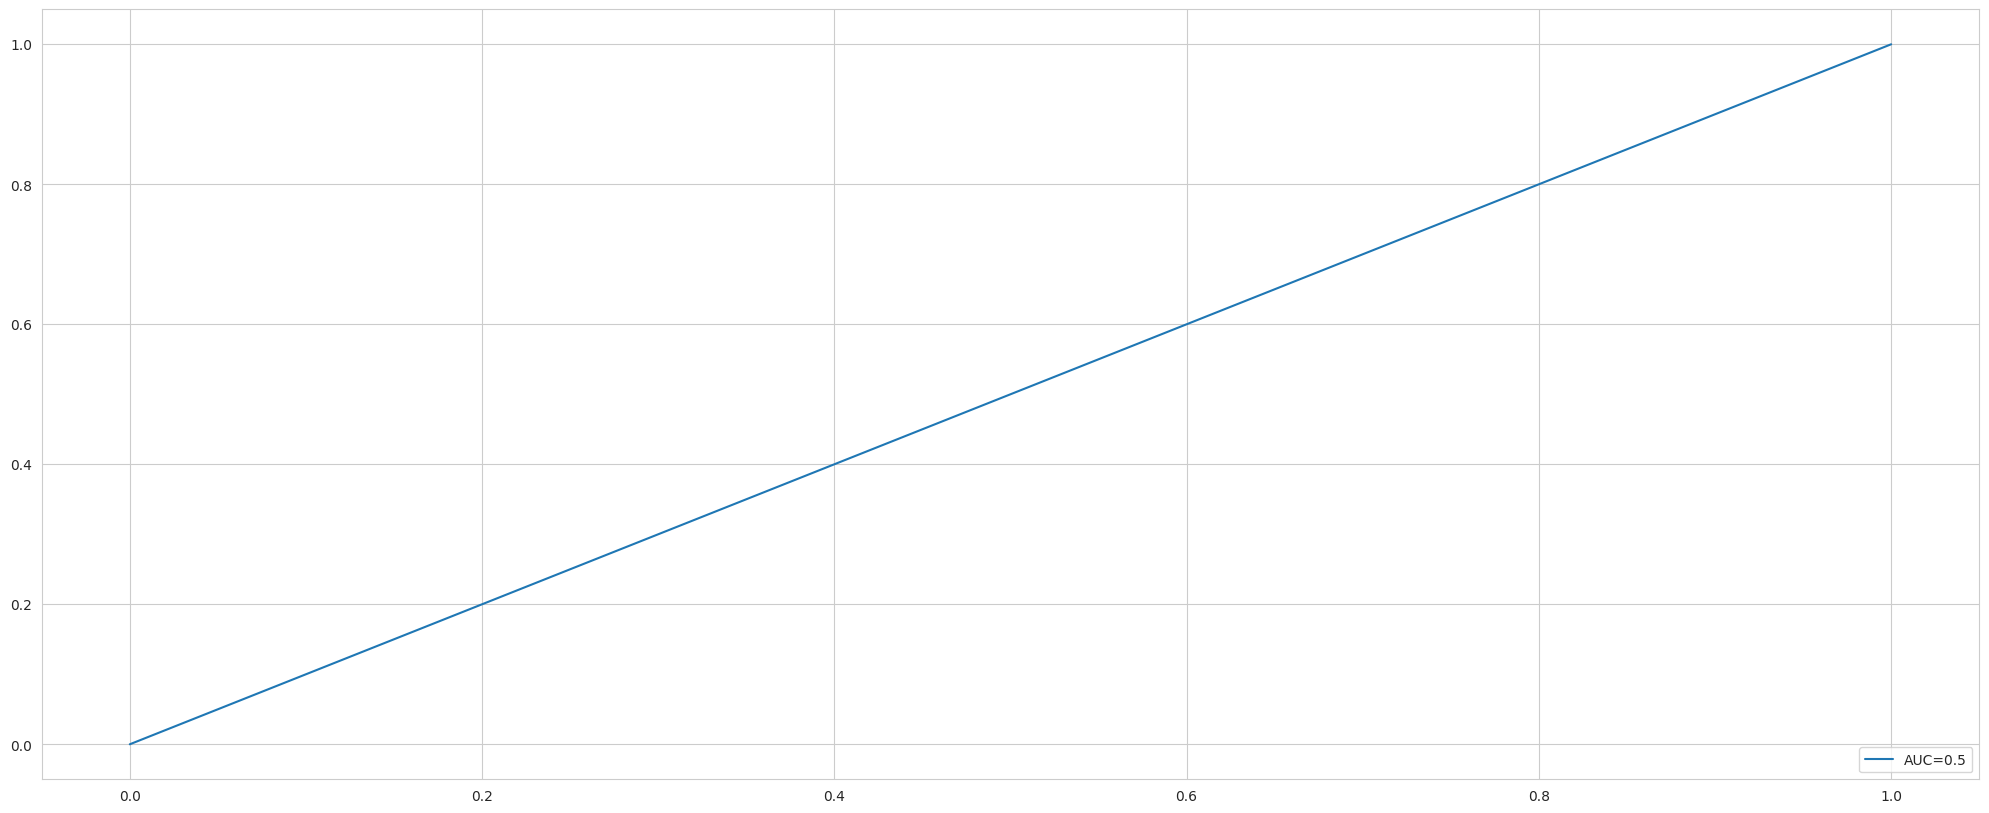

In [396]:
# ROC Curve

y_pred_probabilitas = DT.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest Classifier Model

In [397]:
rf_model = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
rf_model.fit(x_train, y_train)
rf_prediction = rf_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [398]:
# cek akurasi model

print("Accuracy:", accuracy_score(y_test, rf_prediction))

Accuracy: 0.7666666666666667


In [399]:
# Model Evaluation

rf_acc = accuracy_score(y_test, rf_prediction)
accuracy_list.append(100*rf_acc)
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



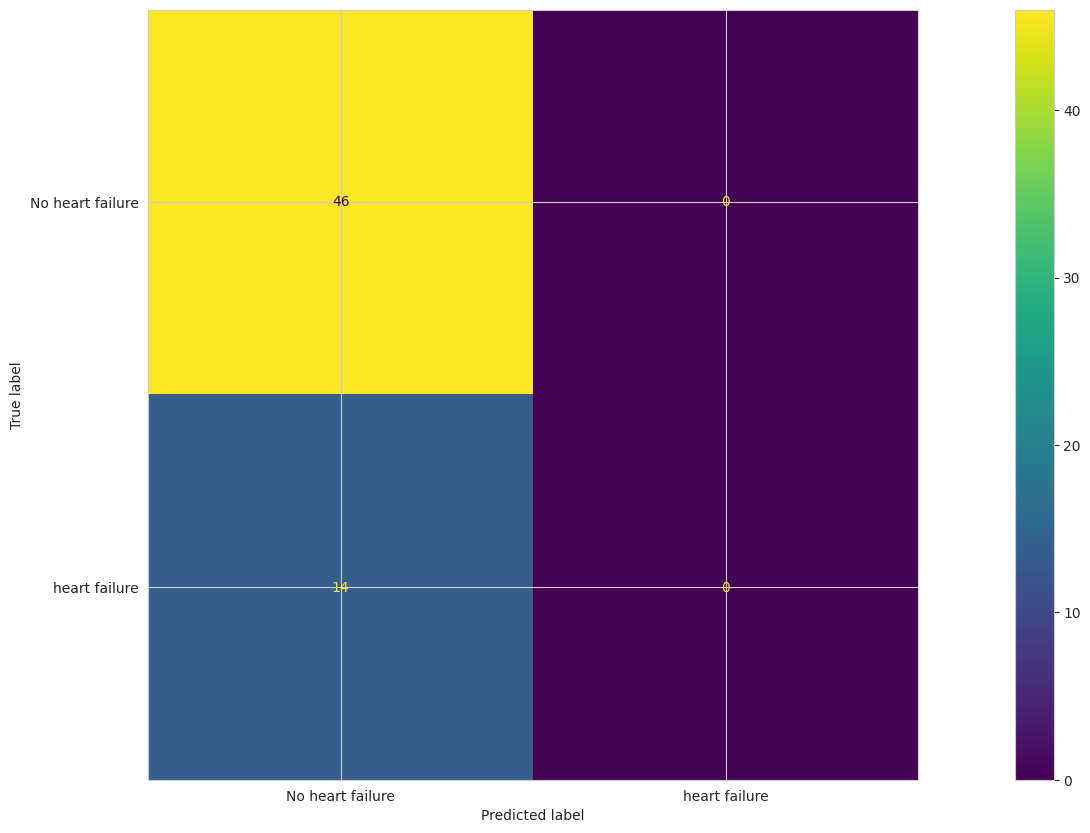

In [400]:
# Confusion MATRIX

cm = confusion_matrix(y_test, rf_prediction)
cmd =  ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



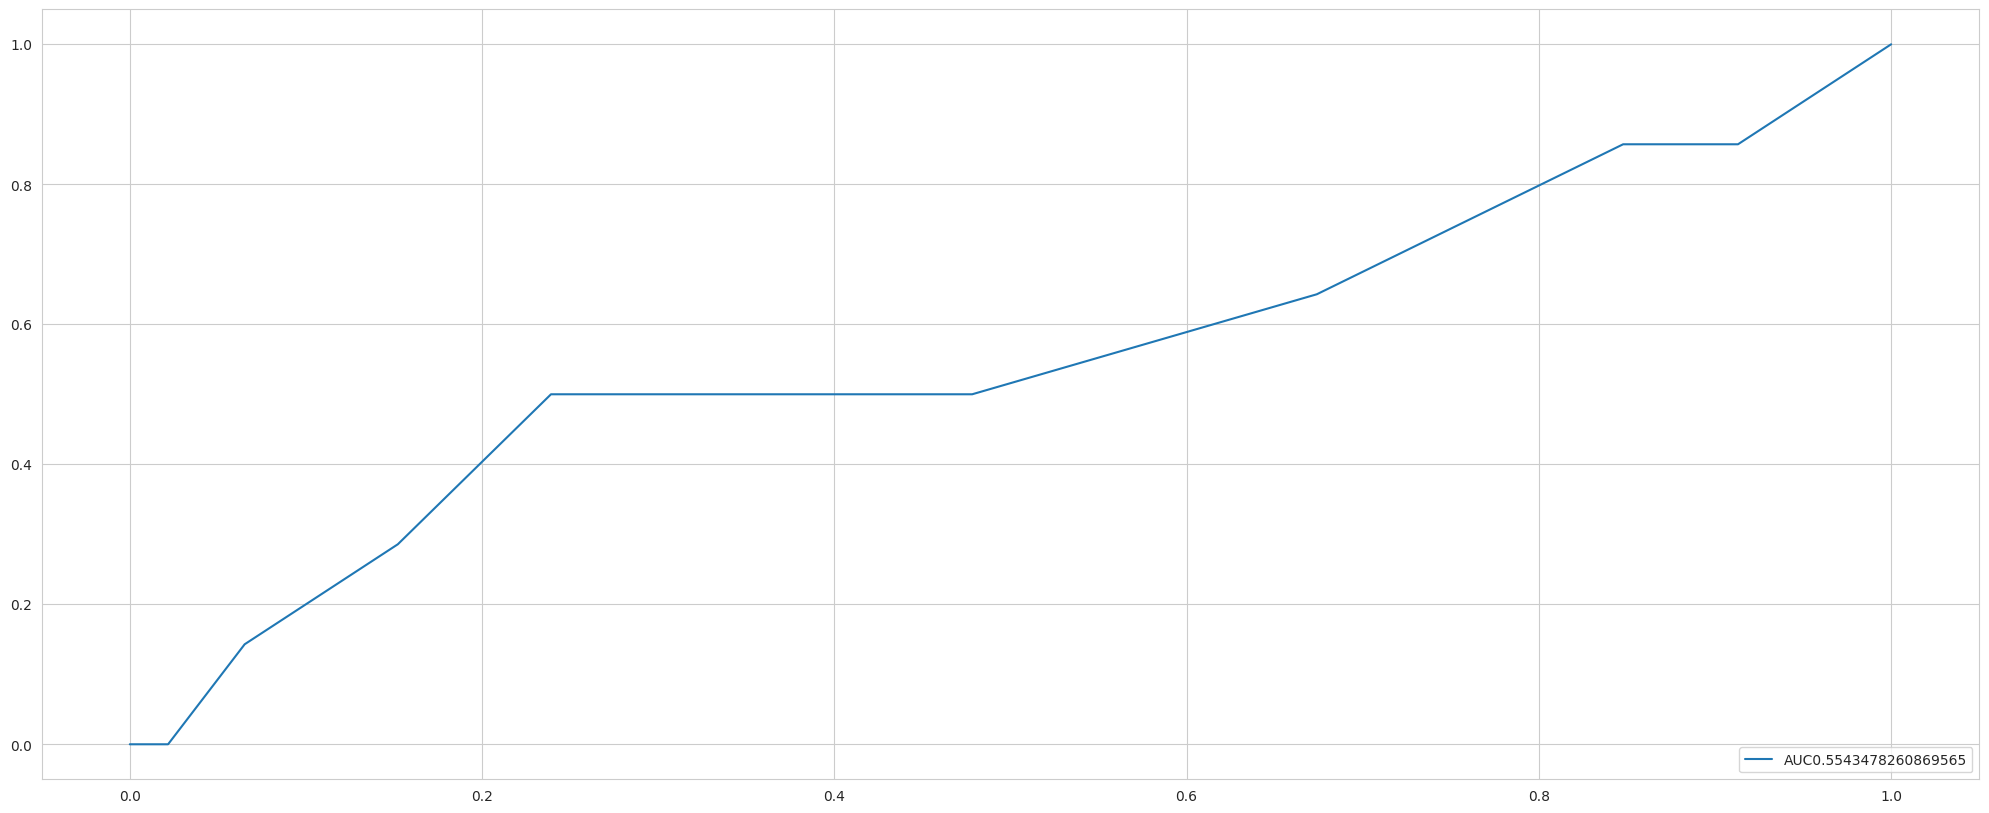

In [401]:
# ROC Curve

y_pred_probabilitas = rf_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label='AUC'+str(auc))
plt.legend(loc=4)
plt.show()

### Implementasi Ensemble Model Classification

## Gradient Boosting Classfier

In [402]:
# Model klasifikasi

gradientboost_ = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_.fit(x_train,y_train)
gradientboost_pred = gradientboost_.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



In [403]:
# cek akurasi model 

print("Accuracy:", accuracy_score(y_test, gradientboost_pred))

Accuracy: 0.75


In [404]:
# Model Evaluation

gbc_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gbc_acc)
print(classification_report(y_test, gradientboost_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        46
           1       0.00      0.00      0.00        14

    accuracy                           0.75        60
   macro avg       0.38      0.49      0.43        60
weighted avg       0.58      0.75      0.66        60



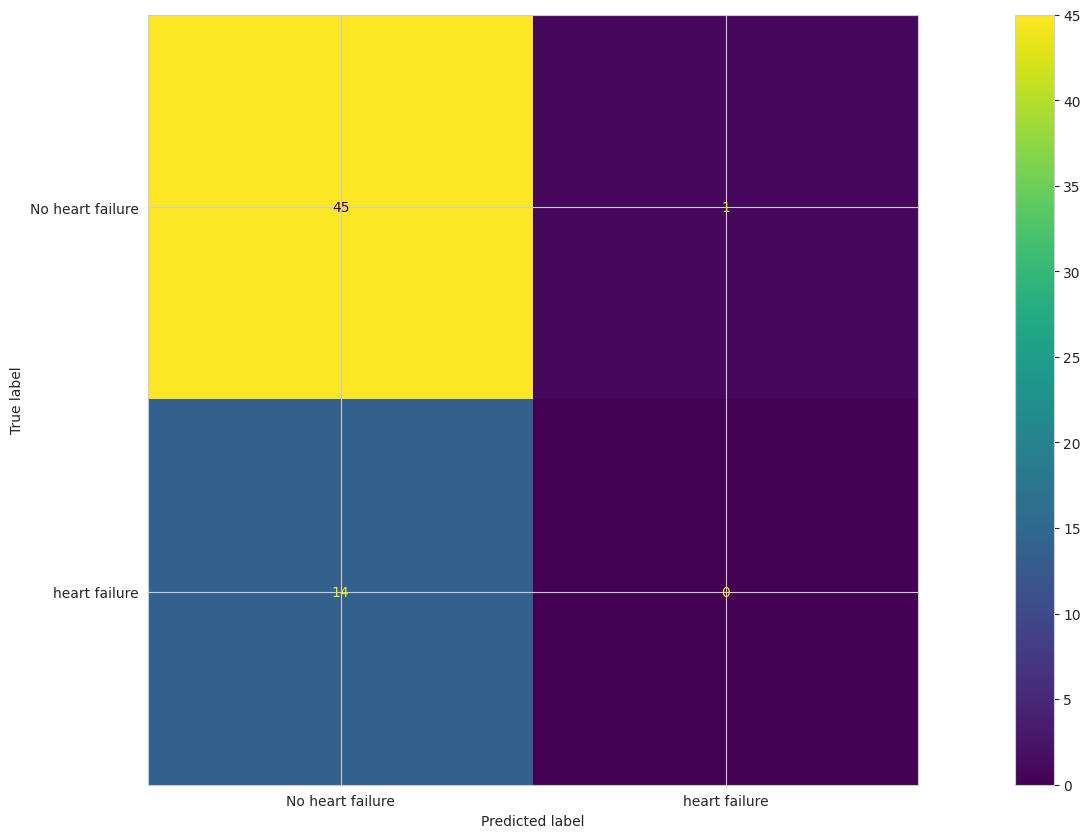

In [405]:
# confusion MATRIX

cm = confusion_matrix(y_test, gradientboost_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



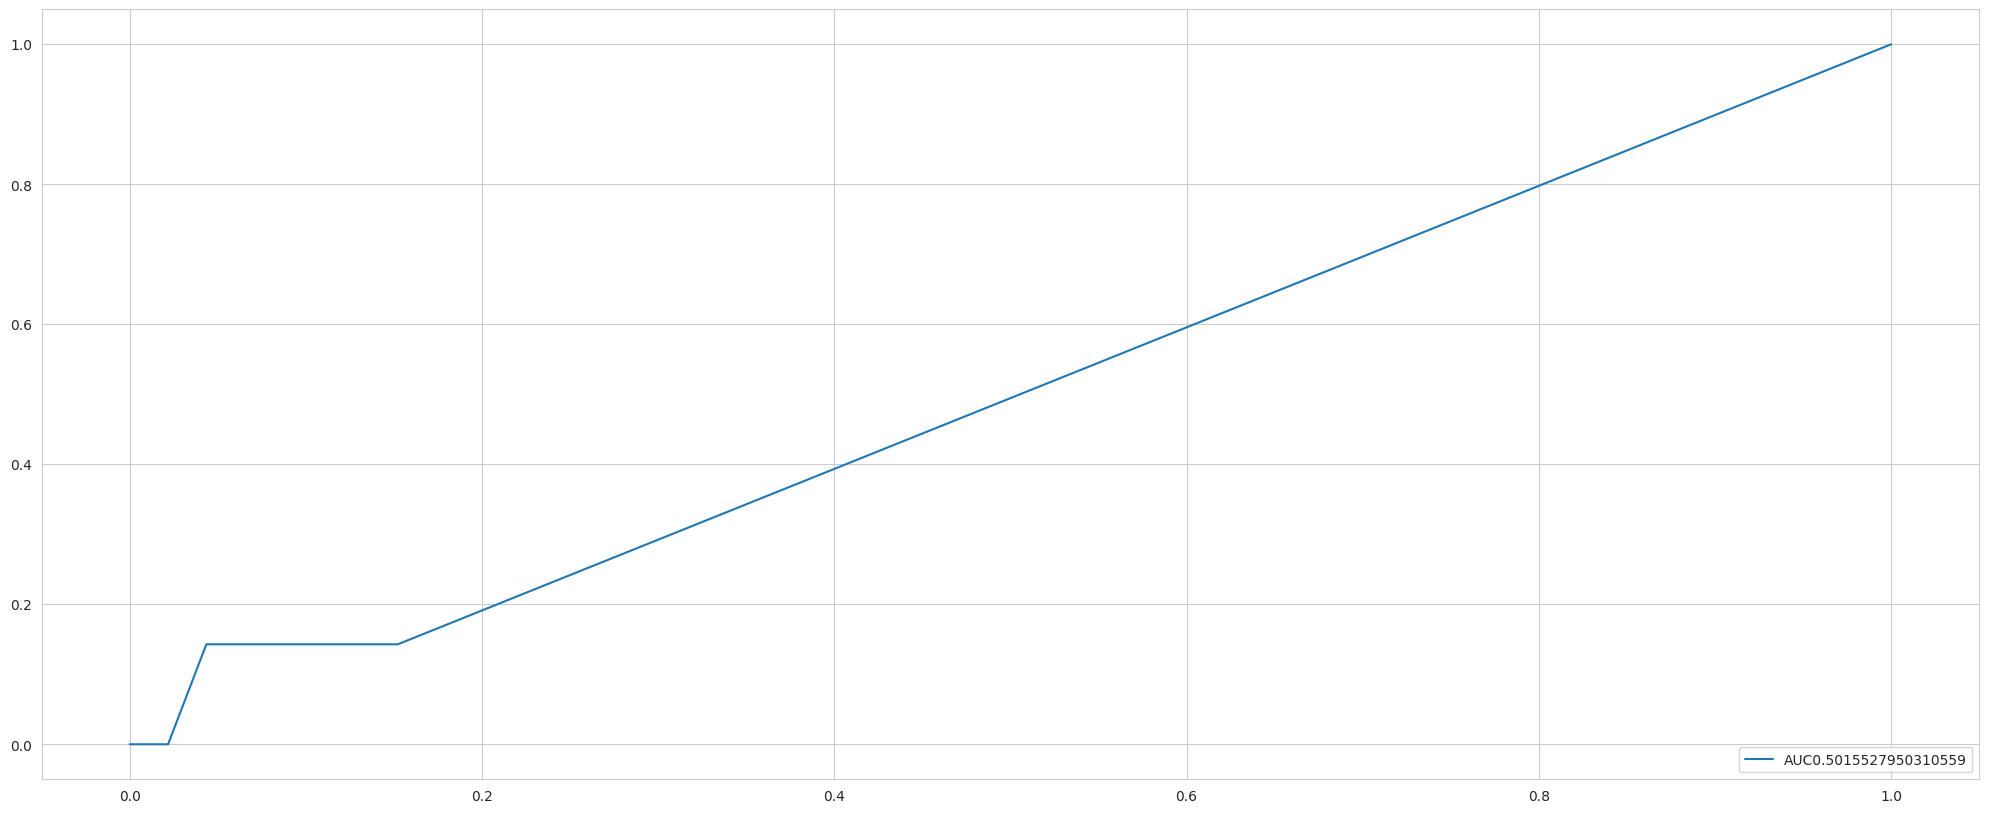

In [406]:
# ROC Curve

y_pred_probabilitas = gradientboost_.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label='AUC'+str(auc))
plt.legend(loc=4)
plt.show()

## Xgboost Classification

In [407]:
# Model klasifikasi

xgboost_model = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgboost_model.fit(x_train, y_train)
xgb_prediction = xgboost_model.predict(x_test)

In [408]:
# cek akurasi model 

print("accuracy:", accuracy_score(y_test, xgb_prediction))

accuracy: 0.7666666666666667


In [409]:
# evaluation model classfication

xgb_model_acc = accuracy_score(y_test, xgb_prediction)
accuracy_list.append(100*xgb_model_acc)
print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



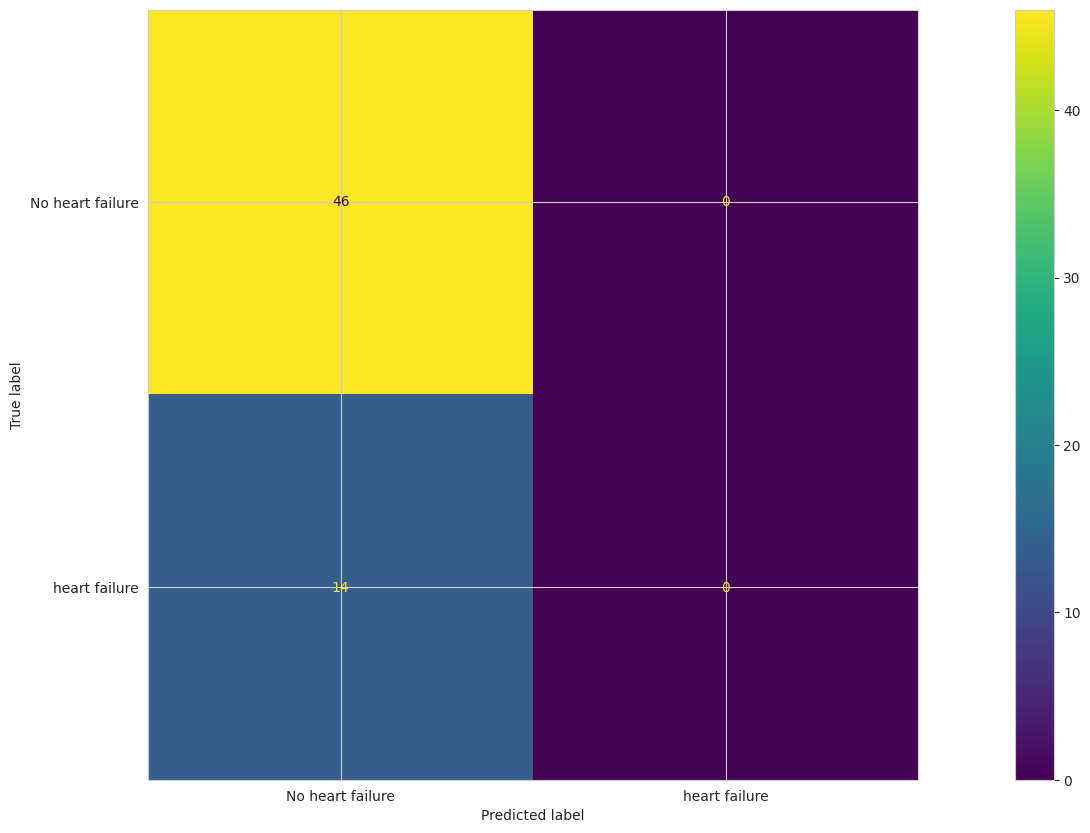

In [410]:
# confusion matrix  model 

cm = confusion_matrix(y_test, xgb_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

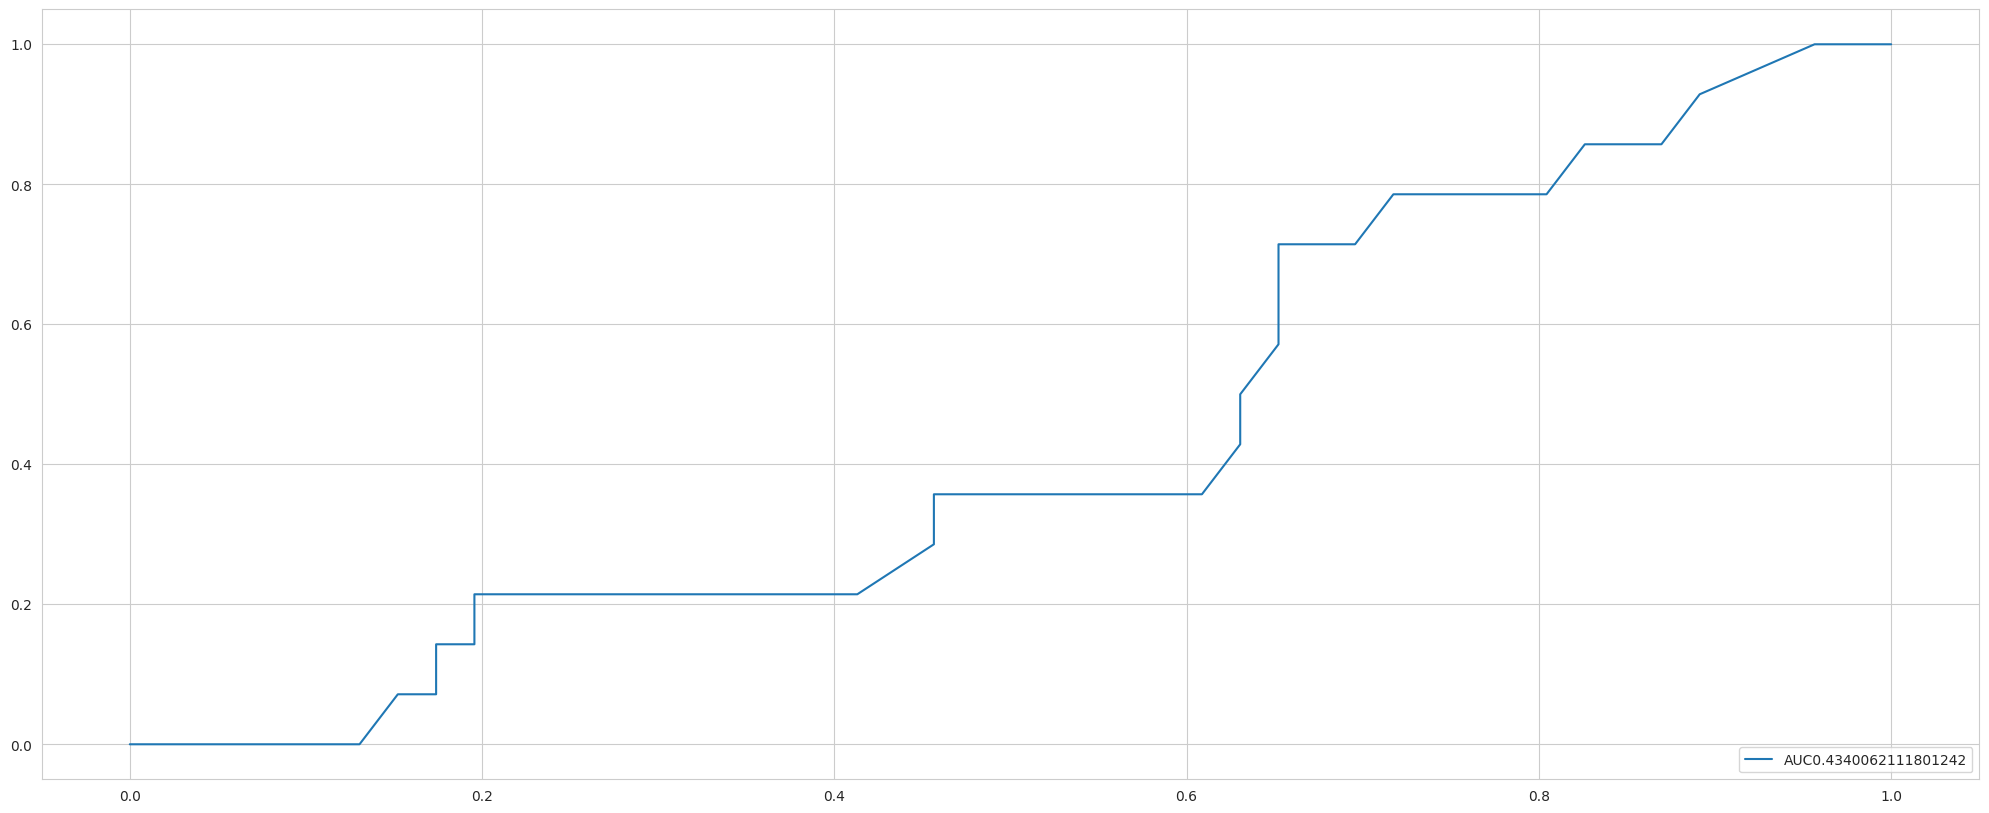

In [411]:
# ROC Curve

y_pred_probabilitas = xgboost_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probabilitas)
auc = metrics.roc_auc_score(y_test, y_pred_probabilitas)
plt.plot(fpr,tpr,label='AUC'+str(auc))
plt.legend(loc=4)
plt.show()

## ensemble with voting

In [417]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[("Logistic Regression",lr),
                                  ("Support Vector Machine",svm),
                                  ("K-Nearest Neighbours",KNN),
                                  ("Decision Tree",DT),
                                  ("Random Forest",rf_model),
                                  ("gradient boosting",gradientboost_),
                                  ("xgboost_model",xgboost_model)])
vote.fit(x_train, y_train)

#max_vote=VotingClassifier(estimators=[("Logistic Regression",l1),("Support Vector Machine ",svc1),("Naive Bayes",nav)])

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=1,
                                                 solver='liblinear')),
                             ('Support Vector Machine',
                              SVC(kernel='linear', probability=True,
                                  random_state=1)),
                             ('K-Nearest Neighbours', KNeighborsClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_leaf_nodes=3,
                                                     random_state=1)),
                             ('Random Forest',
                              RandomFore...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              predictor=None, random_state=1,
                                              reg_alpha=None, ...))])

In [418]:
#prediksi

y_vote_pred = vote.predict(x_test)
print("accuracy:", accuracy_score(y_test,y_vote_pred)*100)

accuracy: 76.66666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



## Perbandingan Akurasi Model 

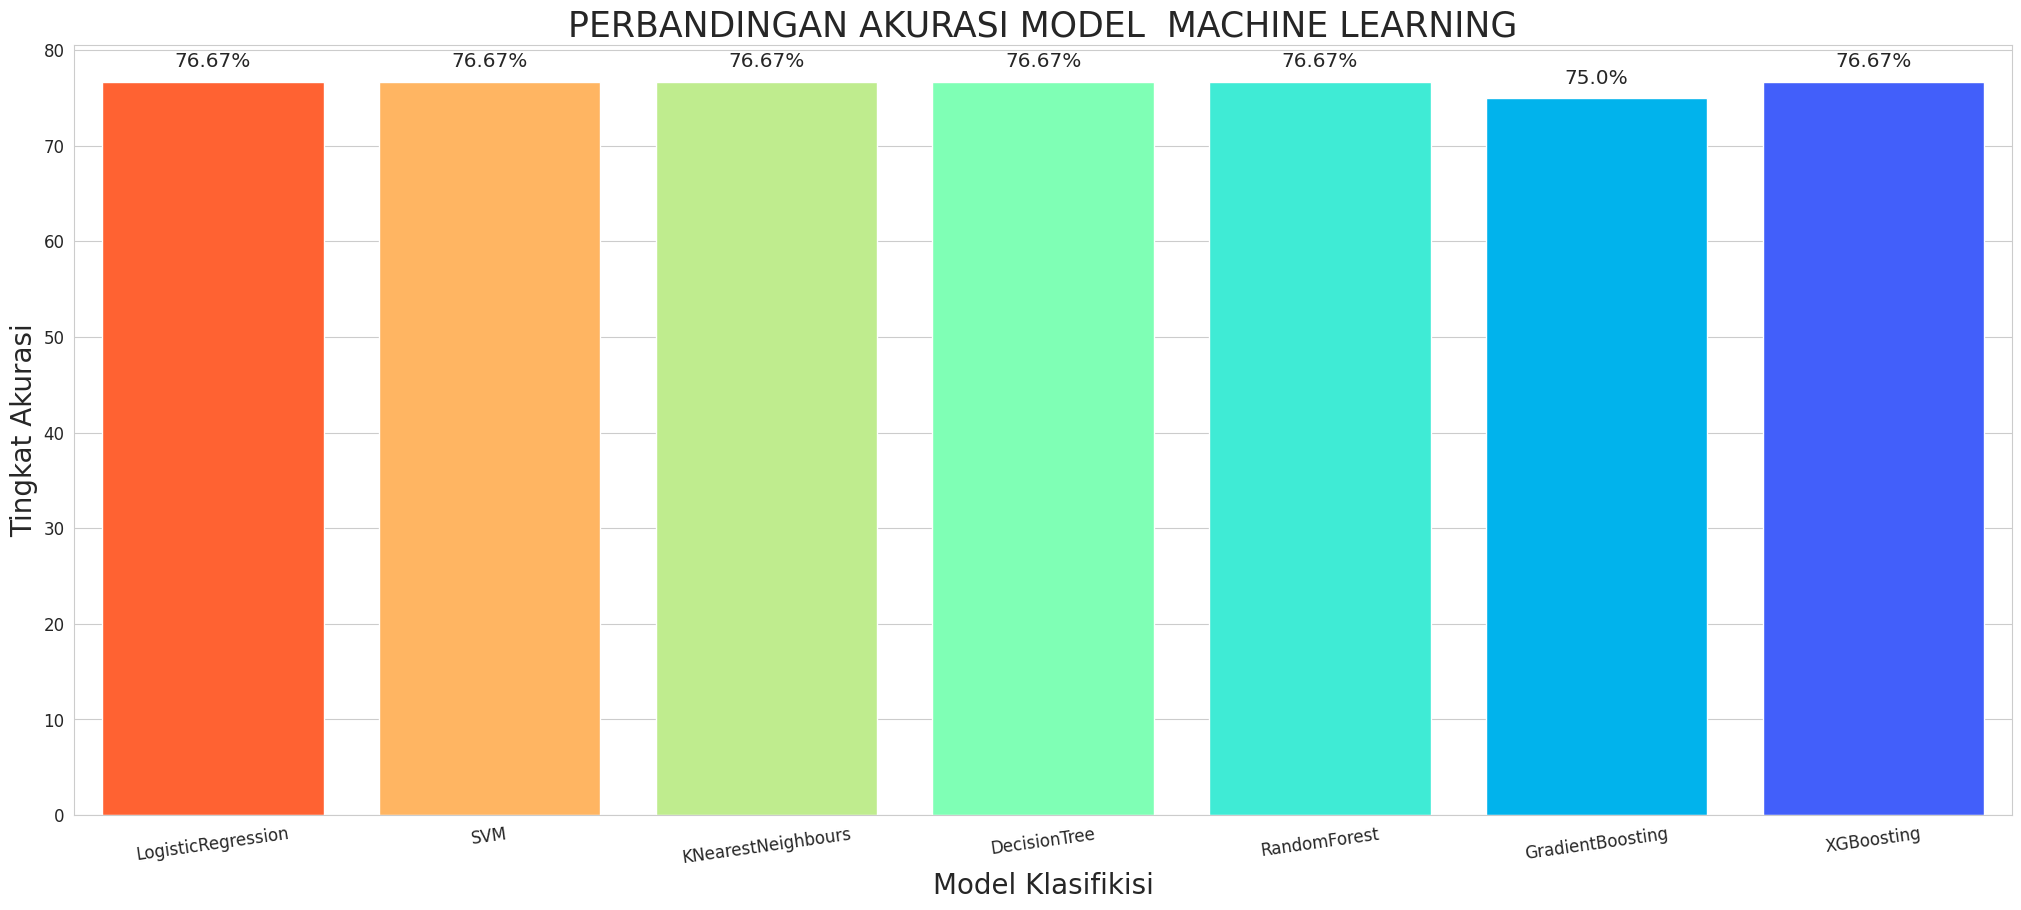

In [416]:
perbandingan_model = ['LogisticRegression', 
                      'SVM',
                      'KNearestNeighbours', 
                      'DecisionTree', 
                      'RandomForest',
                      'GradientBoosting',
                      'XGBoosting']


ax = sns.barplot(x=perbandingan_model, y=accuracy_list, palette = "rainbow_r", saturation =2.0)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=25,10
plt.xlabel('Model Klasifikisi', fontsize = 20 )
plt.ylabel('Tingkat Akurasi', fontsize = 20)
plt.title('PERBANDINGAN AKURASI MODEL  MACHINE LEARNING', fontsize = 25)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Rata rata akurasi model ada di kisaran 75 - 76 baik menggunakan esemble teknik maupun model machine learning lainya.

## Inferencing 

In [415]:
#load model 
import pickle

## Kesimpulan

1. Datasets masih terdapat outliers sehingga berpengaruh dalam beberapa model machine learning, akan tetapi jika dilakukan capping maupun drop datasets tidak lagi faktual karena value features sangat dibutuhkan data aktual seperti feature time, anemia, creatinne_phosphokinas dan lainya.

2. Distribusi umur antara 40 - 90 tahun, dan Kelangsungan hidup tinggi pada umur 40 hingga 70

3. hasil distribusi categorical_kolom menunjukkan bahwa nilai 0 lebih mendominasi daripada nilai 1 yang berarti bahwa dari dataset menunjukkan angka penderita anemia, diabetes, high blood, smooking lebih sedikit daripada terjangkit. 

4. ejection_fraction merupakan salah satu faktor pengaruh survived dan not survived, Semakin tinggi ejection_fraction tingkat kematian semakin rendah

5. Teknik ensmble dengan metode boosting maupun voting memperoleh akurasi sebesar 76.67%. Salah satu pengaruh rendah dan tinggi akurasi disebabkan oleh size dari dateset, semakin besar datasets yang diperoleh probabilitas akurasi didapat semakin tinggi.